# (ADA) Homework 1: Scoring the Language Model Olympics

---

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Create meaningful visualizations to analyze the data;
- Communicate your findings in a clear and concise manner

---

**Important Dates.**

- Homework release: Fri 04 Oct 2024
- Homework due: Sat 18 Oct 2024, 23:59
- Grade release: Mon 04 Nov 2024

**Some rules**

- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
- Make sure you use the data folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
- Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.
- For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).
- Back up any hypotheses and claims with data, since this is an important aspect of the course.
- Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. If there are multiple notebooks present, we will not grade anything.
- We will not run your notebook for you! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a fully-run and evaluated notebook. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

**A Note on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:
- Presumably, you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!
- Some of the TAs on this course literally published many works on detecting machine-generated text.
---

## Context

Context
AI is booming! Newspapers, influencers, and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future looks like…

Freshly graduated from the EPFL, you are hired by the Swiss government to advise on a large-scale “AI integration” initiative code-named **"NEUTRALITY"** (Navigating Efficient Upgrades Through Robust Artificial Learning Integration Techniques Yearly). Convinced by the stunning progress in language modeling, the government would like to battle the growing shortages in the education sector by using LMs. Your job description: investigate which LMs might be best suited!

You are given the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, Horta-Ribeiro, the intern responsible for collecting the results, didn’t take EPFL’s famous ADA course. As a result, the collected datasets are slightly corrupted.

### A very brief primer on Language Models
Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project NEUTRALITY’s objectives:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 PROJECT_NEUTRALITY
│
├── 📄 analysis.ipynb (the file you're currently reading!)
├── 📄 requirements.txt (install into your environment)
│
├── 📁 task_1
├── 📁 task_2
└── 📁 task_2.5
```   
 

In [1]:
# please make sure you install the packages listed in the requirements.txt file in your environment!
# using pip
# pip install -r requirements.txt
#
# using Conda:
# conda create --name <env_name> --file requirements.txt
#
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind
import seaborn as sns

In [2]:
# palettes definition for plots
ABCDpalette = sns.color_palette("rocket", 4)
XYZpalette = 'mako'
MMLUotherpalette = 'ocean'
shufflepalette = 'viridis'
QApalette = ['#4F7F7F', '#2A2D5D']

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [3]:
df_test, df_x, df_y, df_z = (pd.read_csv(path) for path in ['task_1/mmlu_data/test.csv', 'task_1/lm_scores/lm_X.csv', 'task_1/lm_scores/lm_Y.csv', 'task_1/lm_scores/lm_Z.csv'])

print(f'shapes: df_test: {df_test.shape}, df_x: {df_x.shape}, df_y: {df_y.shape}, df_z: {df_z.shape}')
print(f'sizes: df_test: {df_test.size}, df_x: {df_x.size}, df_y: {df_y.size}, df_z: {df_z.size}')
print('Note that not all questions are answered by all LMs and that the question_id column is not compact.')

shapes: df_test: (14042, 8), df_x: (13882, 2), df_y: (13978, 2), df_z: (13923, 2)
sizes: df_test: 112336, df_x: 27764, df_y: 27956, df_z: 27846
Note that not all questions are answered by all LMs and that the question_id column is not compact.


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

In [4]:
# A
result_count_x = df_x.result.value_counts()
result_count_y = df_y.result.value_counts()
result_count_z = df_z.result.value_counts()
print('\n' + 20 * '-' + ' LM X '+ 20 * '-' + '\n', result_count_x)


-------------------- LM X --------------------
 result
A                                                                                                                 2733
A                                                                                                                 1657
B                                                                                                                 1412
Answer: A                                                                                                         1398
C                                                                                                                 1134
                                                                                                                  ... 
judicial activism, so the answer is A                                                                                1
creating insurmountable obstacles to the founding of factions, so the answer is A                              

In [5]:
print('\n' + 20 * '-' + ' LM Y '+ 20 * '-' + '\n', result_count_y)


-------------------- LM Y --------------------
 result
D                                                                                                2894
Answer: D                                                                                        1718
C                                                                                                1701
B                                                                                                1240
D                                                                                                1145
                                                                                                 ... 
Where the energy of interaction between the atoms is at its minimum value, so the answer is A       1
leaves more viable offspring than others of its species., so the answer is D                        1
A and C only, so the answer is D                                                                    1
ADP + P → ATP, so the answ

In [6]:
print('\n' + 20 * '-' + ' LM Z '+ 20 * '-' + '\n', result_count_z)


-------------------- LM Z --------------------
 result
D                                                                                   2257
C                                                                                   2191
B                                                                                   2127
A                                                                                   2060
Answer: D                                                                            777
                                                                                    ... 
omission of a universal suffrage clause, so the answer is D                            1
declare war, so the answer is D                                                        1
state and local governments, by means of federal funding, so the answer is B           1
less clearly identified with consistent political ideologies, so the answer is B       1
Rahit, so the answer is B                             

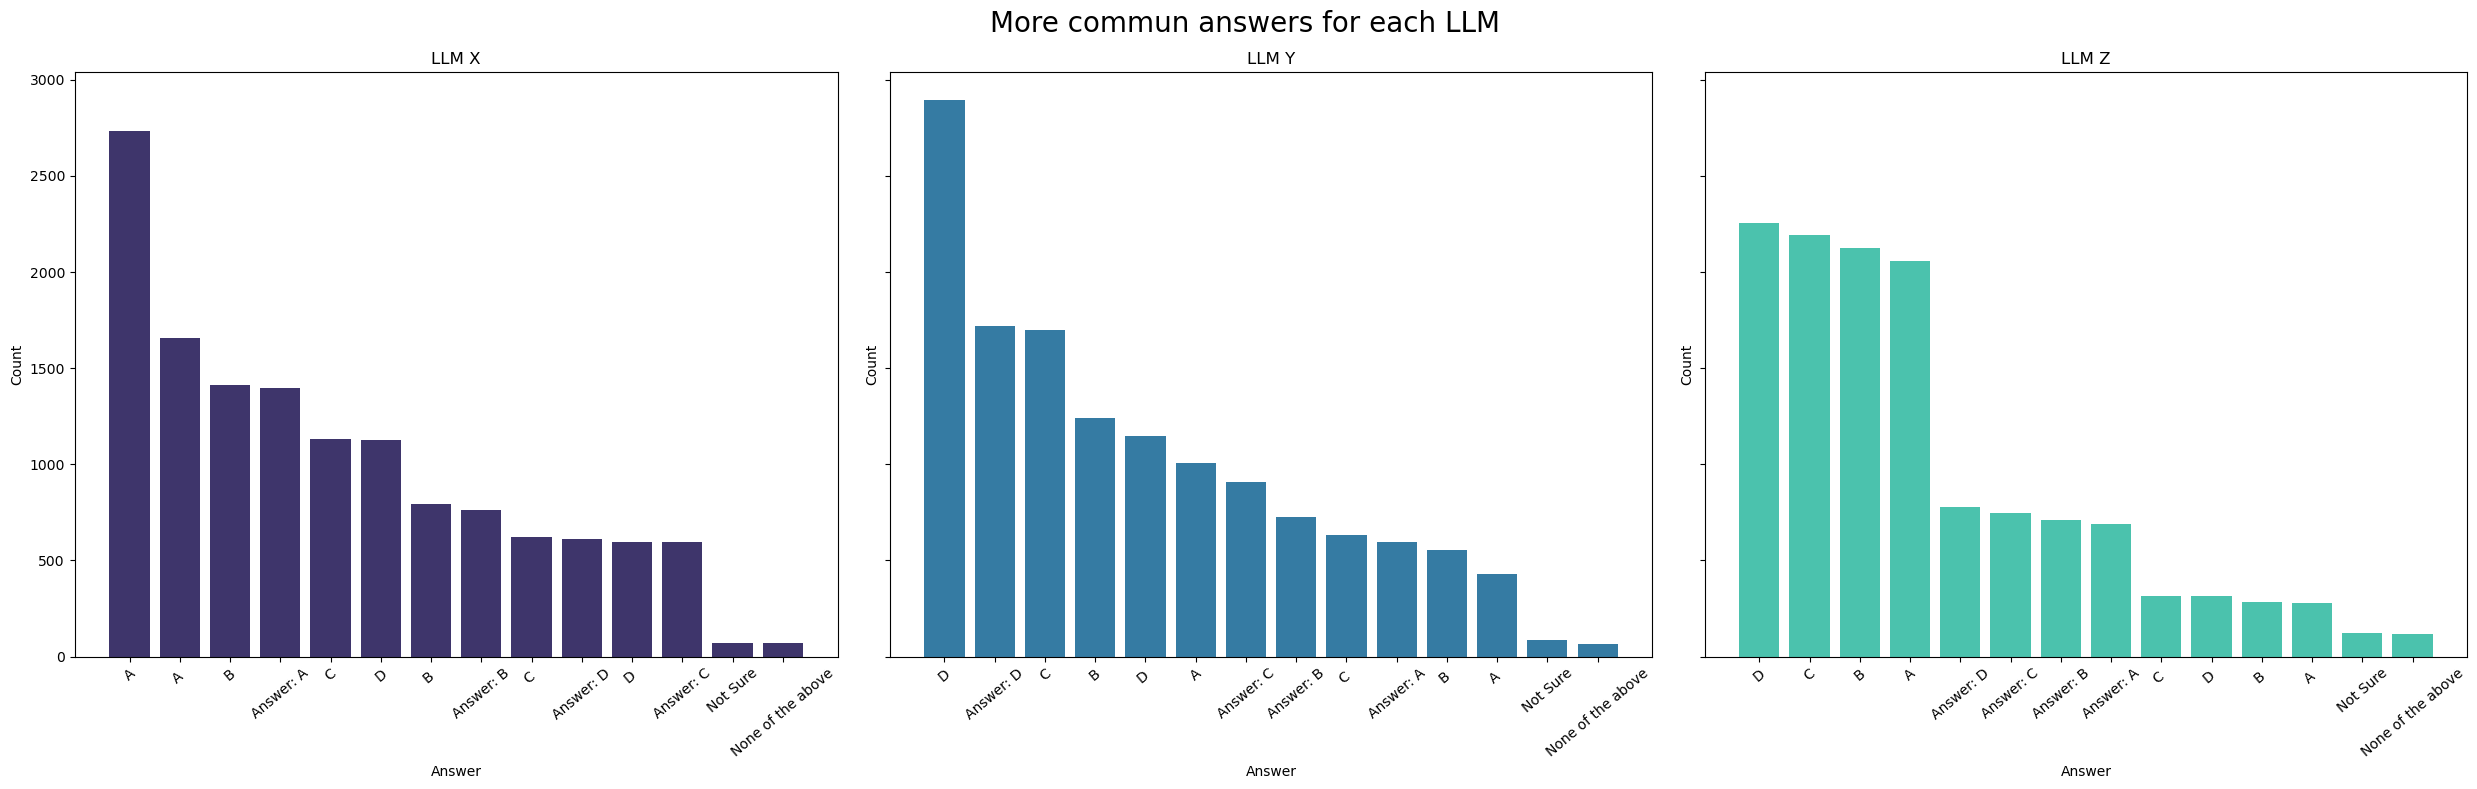

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(25, 8), sharey=True)
palette = sns.color_palette(XYZpalette,3)

for i, (data, name) in enumerate(zip([result_count_x, result_count_y, result_count_z], ['LLM X', 'LLM Y', 'LLM Z'])):
    tops = data.nlargest(14)
    axes[i].bar(tops.index, tops.values, color = palette[i])
    axes[i].set_title(name)
    axes[i].set_xlabel('Answer')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=40)

fig.suptitle('More commun answers for each LLM', fontsize=20)
plt.tight_layout()
plt.show()

In [8]:
# B
df_x.result.unique()[0:30]

array(['B', 'C', 'D ', 'B ', 'Answer: B', 'A', 'Answer: D', 'Answer: C',
       'Answer: A', 'Not Sure', 'A ', 'C ', nan, 'D', 'None of the above',
       '3, so the answer is B',
       'is prevented from everting by papillary muscles., so the answer is B',
       'lingual branch of the mandibular trigeminal nerve., so the answer is A',
       'These craters contain the only permanently shadowed regions on Mercury, so the answer is D',
       'Unsafe practices, Wants, Fear, Trivial, so the answer is A',
       'phosphofructokinase., so the answer is D',
       'They provide access to phosphorus, an essential element that is limited in many kinds of soils., so the answer is C',
       'Lead to death due to an inability of the cell to pass electrons to oxygen, thus stopping aerobic respiration and asphyxiating the cells., so the answer is A',
       'creatine phosphorylation., so the answer is B',
       'Mass of the moon, so the answer is A', '5, so the answer is A',
       'True, True

B./Discuss:/

After inspection, we observe the *"expected" case*: standard single-letter response such as A, B, C, or D, where only the answer is provided (which is the majority of cases).

However, we also found some *unexpected format* such as:

- **Prefixed with "Answer:"** : Responses such as "Answer: B" or "Answer:C" are logically correct but include unnecessary prefixes such as "Answer:", which deviates from the required concise format.

- **Uncertainty** : In cases where the model was unsure or lacked the information to respond, answers such as "Not sure", "nan". These are unexpected, since a definitive response from the multiple-choice options was required.

- **Missing Answer** : Responses like "None of the above" indicate that the model either misunderstood the options or failed to provide an answer from the given choices.

- **Justification or a literal string answer** : Another format includes a justification or the literal string answer before the expected answer, like "These craters contain the only permanently shadowed regions on Mercury, so the answer is D" or "Mass of the moon, so the answer is A".

### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [9]:
# A

df_x_clean, df_y_clean, df_z_clean = map(lambda x: x.copy()[x.result.str.len() < 10], (df_x, df_y, df_z))

print(f'shapes: df_x: {df_x_clean.shape}, df_y: {df_y_clean.shape}, df_z: {df_z_clean.shape}')
print(f'sizes:  df_x: {df_x_clean.size}, df_y: {df_y_clean.size}, df_z: {df_z_clean.size}')

shapes: df_x: (13509, 2), df_y: (13637, 2), df_z: (12878, 2)
sizes:  df_x: 27018, df_y: 27274, df_z: 25756


In [10]:
# B

def clean_answer(s):
    return str(s).replace(' ', '').replace('Answer:', '')

def remove_not_sure(df):
    df = df[df['result'] != 'NotSure']
    return df

df_x_clean.loc[:, 'result'] = df_x_clean['result'].apply(clean_answer)
df_y_clean.loc[:, 'result'] = df_y_clean['result'].apply(clean_answer)
df_z_clean.loc[:, 'result'] = df_z_clean['result'].apply(clean_answer)

df_x_clean, df_y_clean, df_z_clean = map(lambda df: remove_not_sure(df), (df_x_clean, df_y_clean, df_z_clean))

print(f'Shapes: df_x: {df_x_clean.shape}, df_y: {df_y_clean.shape}, df_z: {df_z_clean.shape}')
print(f'Sizes:  df_x: {df_x_clean.size}, df_y: {df_y_clean.size}, df_z: {df_z_clean.size}')

print("\nThe values of the results are indeed only 'A', 'B', 'C', 'D'")
for df, df_name in zip((df_x_clean, df_y_clean, df_z_clean), ('X', 'Y', 'Z')): 
    print(f'LM {df_name} result values: {df.result.value_counts().index.tolist()}')

Shapes: df_x: (13436, 2), df_y: (13551, 2), df_z: (12753, 2)
Sizes:  df_x: 26872, df_y: 27102, df_z: 25506

The values of the results are indeed only 'A', 'B', 'C', 'D'
LM X result values: ['A', 'B', 'C', 'D']
LM Y result values: ['D', 'C', 'B', 'A']
LM Z result values: ['D', 'C', 'B', 'A']


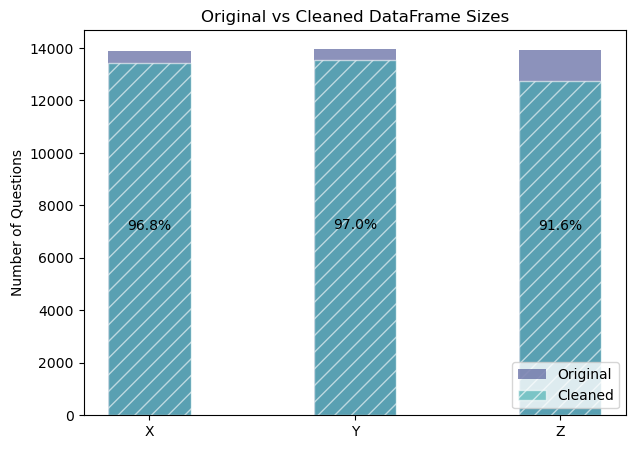

In [11]:
fig, ax = plt.subplots(figsize=(7, 5))
palette = sns.color_palette(XYZpalette,2)

original_sizes = [df_x.shape[0], df_y.shape[0], df_z.shape[0]]
cleaned_sizes = [df_x_clean.shape[0], df_y_clean.shape[0], df_z_clean.shape[0]]

labels = ['X', 'Y', 'Z']
x = np.arange(len(labels))

plt.bar(x, original_sizes, width=0.4, label='Original', color=palette[0], alpha=0.6)
plt.bar(x, cleaned_sizes, width=0.4, label='Cleaned', color=palette[1], hatch='//', alpha=0.6, edgecolor='w')

percentages = [round((cleaned/original) * 100, 2) for cleaned, original in zip(cleaned_sizes, original_sizes)]
 
for i, p in enumerate(ax.patches[0:3]):
    if p.get_width()!=0 :
        h, w, x_ = p.get_height(), p.get_width(), p.get_x()
        xy = (x_ + w / 2., h/2)
        text = f'{percentages[i]:.1f}%'
        ax.annotate(text=text, xy=xy, ha='center', va='bottom')

plt.xticks(x, labels)
plt.ylabel('Number of Questions')
plt.title('Original vs Cleaned DataFrame Sizes')
plt.legend(loc='lower right')
plt.show()

In [12]:
print("C. /Discuss:/", "\n")
for original_size, cleaned_size, label in zip(original_sizes, cleaned_sizes, labels):
    print(f"In Dataframe {label} : We started with {original_size} questions and after cleaning we have {cleaned_size} questions")
    print(f"Which means we removed {original_size - cleaned_size} questions, which represent a loss of {round((1 - cleaned_size/original_size) * 100, 2)}% of the data\n")

C. /Discuss:/ 

In Dataframe X : We started with 13882 questions and after cleaning we have 13436 questions
Which means we removed 446 questions, which represent a loss of 3.21% of the data

In Dataframe Y : We started with 13978 questions and after cleaning we have 13551 questions
Which means we removed 427 questions, which represent a loss of 3.05% of the data

In Dataframe Z : We started with 13923 questions and after cleaning we have 12753 questions
Which means we removed 1170 questions, which represent a loss of 8.4% of the data



The loss caused by the filtering seems reasonable.

### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [13]:
# A

x_merge, y_merge, z_merge = map(lambda x: pd.merge(x, df_test, on='question_id', how='inner'), (df_x_clean, df_y_clean, df_z_clean))
x_merge.head()

,question_id,result,question,A,B,C,D,answer,subject
0,0,B,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra
1,1,C,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra
2,2,D,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra
3,3,B,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra
4,4,B,Find the product of the given polynomials in t...,2x^2 + 5,6x^2 + 4x + 6,0,x^2 + 1,B,abstract algebra


In [14]:
#B

x_merge['correct'], y_merge['correct'], z_merge['correct'] = map(lambda x: x['result']==x['answer'], (x_merge, y_merge, z_merge))

avg_score_x, avg_score_y, avg_score_z  = map(lambda x: x.correct.sum()*100/len(x), (x_merge, y_merge, z_merge))
score_sem_x, score_sem_y, score_sem_z  = map(lambda x: x.correct.sem(), (x_merge, y_merge, z_merge)) # CI is 1.96xSE either side of the mean

print(f'LM X average score: {avg_score_x:.3f} % (standard error to the mean: {score_sem_x:.4f})')
print(f'LM Y average score: {avg_score_y:.3f} % (standard error to the mean: {score_sem_y:.4f})')
print(f'LM Z average score: {avg_score_z:.3f} % (standard error to the mean: {score_sem_z:.4f})')

LM X average score: 76.749 % (standard error to the mean: 0.0036)
LM Y average score: 74.585 % (standard error to the mean: 0.0037)
LM Z average score: 66.329 % (standard error to the mean: 0.0042)


### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X since: (200 - 181) / 181 > 0.10

In [15]:
# A

# Count number of answers per subjects 
subjects_stats = x_merge.groupby('subject').apply(lambda subject: pd.Series({'nb_answer_x' : len(subject['result'])}), include_groups=False)
subjects_stats['nb_answer_y'] = y_merge.groupby('subject').apply(lambda subject: len(subject['result']), include_groups=False)
subjects_stats['nb_answer_z'] = z_merge.groupby('subject').apply(lambda subject: len(subject['result']), include_groups=False)

# Compute maximal distance between number of answers per subjects 
subjects_stats['max_diff'] = abs(subjects_stats.max(axis=1)-subjects_stats.min(axis=1))/subjects_stats.min(axis=1)

subjects_stats.head(10)


,nb_answer_x,nb_answer_y,nb_answer_z,max_diff
subject,,,,
abstract algebra,95,97,95,0.021053
anatomy,129,130,125,0.040000
astronomy,144,148,137,0.080292
business ethics,98,96,92,0.065217
clinical knowledge,259,261,244,0.069672
college biology,139,140,131,0.068702
college chemistry,96,98,84,0.166667
college computer science,97,98,84,0.166667
college mathematics,99,100,93,0.075269


In [16]:
print(r'Subjects that have more than 10% diffrence between the number of answers are: ')
subjects_stats[subjects_stats['max_diff'] > 0.1]['max_diff']

Subjects that have more than 10% diffrence between the number of answers are: 


subject
college chemistry           0.166667
college computer science    0.166667
computer security           0.126437
formal logic                0.128440
high school geography       0.107955
logical fallacies           0.132353
medical genetics            0.101124
moral disputes              0.316000
moral scenarios             0.173677
Name: max_diff, dtype: float64

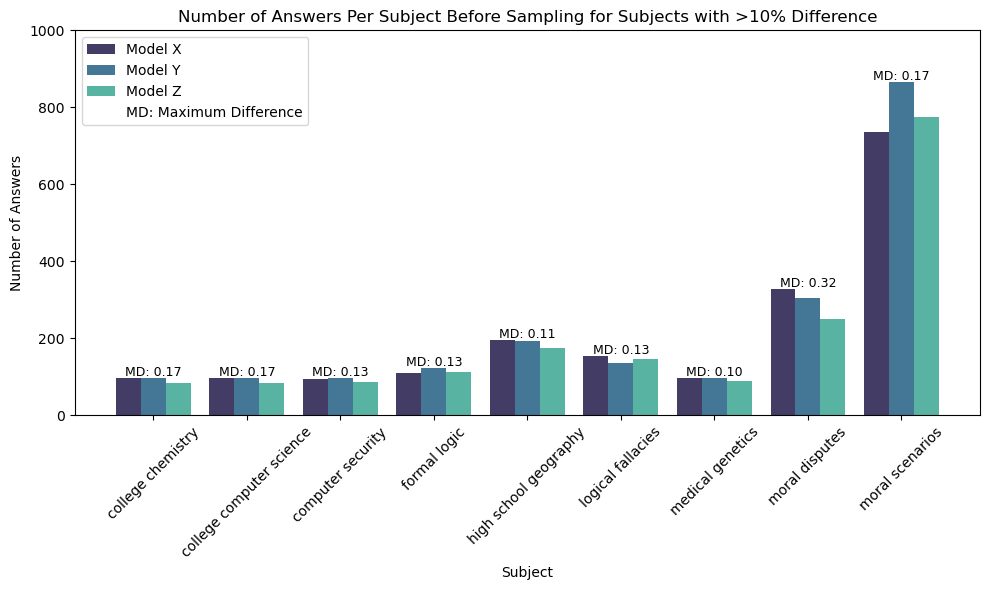

In [17]:
df_before = subjects_stats[subjects_stats['max_diff'] > 0.1].reset_index()
filtered_subjects = df_before['subject'].tolist()

bar_width = 0.2
index = range(len(data))

fig = plt.figure(figsize=(10, 6))

melt_data = df_before.melt(id_vars='subject', value_vars=['nb_answer_x', 'nb_answer_y', 'nb_answer_z'],
                        var_name='Model', value_name='Number of Answers')

sns.barplot(data=melt_data, x='subject', y='Number of Answers', hue='Model', palette=XYZpalette)

for i, txt in enumerate(df_before['max_diff']):
    plt.text(i, max(df_before['nb_answer_x'][i], df_before['nb_answer_y'][i], df_before['nb_answer_z'][i]) + 5,
            f"MD: {txt:.2f}", ha='center', fontsize=9)

# Custom labels
labels = ['Model X', 'Model Y', 'Model Z', 'MD: Maximum Difference']
plt.plot([], [], ' ', label=labels[-1])# Empty plot to add the label
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels)
plt.xlabel('Subject')
plt.ylabel('Number of Answers')
plt.xticks(rotation=45)
plt.ylim((0, 1000))

plt.title('Number of Answers Per Subject Before Sampling for Subjects with >10% Difference')
plt.tight_layout()
plt.show()

In [18]:
from sklearn.utils import resample
# Set seed for reproducibility
np.random.seed(1)

# B
print('Random oversampling or undersampling can be used to balance the number of answers per subject.')
print('This is done by duplicating or removing some answers from the subjects with the most or least answers.\n')

# For over/under-sampling: find the maximum/minimum number of answers for each subject
max_answers = subjects_stats[['nb_answer_x', 'nb_answer_y', 'nb_answer_z']].max(axis=1)
min_answers = subjects_stats[['nb_answer_x', 'nb_answer_y', 'nb_answer_z']].min(axis=1)

def oversample(group):
    return resample(group, replace=True, n_samples=max_answers[group.index[0]])

def undersample(group):
    return resample(group, replace=False, n_samples=min_answers[group.index[0]])

# Oversample each subject to match the maximum number of answers
x_oversampled, y_oversampled, z_oversampled = map(lambda x: x.set_index('subject').groupby('subject').apply(oversample), (x_merge, y_merge, z_merge))

print(f'Oversampled shapes: x_oversampled: {x_oversampled.shape}, y_oversampled: {y_oversampled.shape}, z_oversampled: {z_oversampled.shape}')
print(f'Note that the sum over all the answers with maximum value is indeed {max_answers.sum()}\n')

# Undersample each subject to match the minimimum number of answers
x_undersampled, y_undersampled, z_undersampled = map(lambda x: x.set_index('subject').groupby('subject').apply(undersample), (x_merge, y_merge, z_merge))

print(f'Undersampled shapes: x_undersampled: {x_undersampled.shape}, y_undersampled: {y_undersampled.shape}, z_undersampled: {z_undersampled.shape}')
print(f'Note that the sum over all the answers with minimimum value is indeed {min_answers.sum()}')

Random oversampling or undersampling can be used to balance the number of answers per subject.
This is done by duplicating or removing some answers from the subjects with the most or least answers.

Oversampled shapes: x_oversampled: (13648, 9), y_oversampled: (13648, 9), z_oversampled: (13648, 9)
Note that the sum over all the answers with maximum value is indeed 13648

Undersampled shapes: x_undersampled: (12697, 9), y_undersampled: (12697, 9), z_undersampled: (12697, 9)
Note that the sum over all the answers with minimimum value is indeed 12697


In [19]:
# C

x_oversampled['correct'], y_oversampled['correct'], z_oversampled['correct'] = map(lambda x: x['result']==x['answer'], (x_oversampled, y_oversampled, z_oversampled))
avg_score_x_oversampled, avg_score_y_oversampled, avg_score_z_oversampled  = map(lambda x: x['correct'].sum()*100/len(x), (x_oversampled, y_oversampled, z_oversampled))
score_sem_x_oversampled, score_sem_y_oversampled, score_sem_z_oversampled  = map(lambda x: x.correct.sem(), (x_oversampled, y_oversampled, z_oversampled))

for (score, sem), name in zip([(avg_score_x_oversampled, score_sem_x_oversampled), (avg_score_y_oversampled, score_sem_y_oversampled), (avg_score_z_oversampled, score_sem_z_oversampled)], ['X', 'Y', 'Z']):
    print(f'Oversampled LM {name} average score: {score:.3f} % (standard error to the mean: {sem:.4f})')
print() # empty line for nicer output

x_undersampled['correct'], y_undersampled['correct'], z_undersampled['correct'] = map(lambda x: x['result']==x['answer'], (x_undersampled, y_undersampled, z_undersampled))
avg_score_x_undersampled, avg_score_y_undersampled, avg_score_z_undersampled  = map(lambda x: x['correct'].sum()*100/len(x), (x_undersampled, y_undersampled, z_undersampled))
score_sem_x_undersampled, score_sem_y_undersampled, score_sem_z_undersampled  = map(lambda x: x.correct.sem(), (x_undersampled, y_undersampled, z_undersampled))

for (score, sem), name in zip([(avg_score_x_undersampled, score_sem_x_undersampled), (avg_score_y_undersampled, score_sem_y_undersampled), (avg_score_z_undersampled, score_sem_z_undersampled)], ['X', 'Y', 'Z']):
    print(f'Undersampled LM {name} average score: {score:.3f} % (standard error to the mean: {sem:.4f})')

Oversampled LM X average score: 76.832 % (standard error to the mean: 0.0036)
Oversampled LM Y average score: 74.363 % (standard error to the mean: 0.0037)
Oversampled LM Z average score: 66.552 % (standard error to the mean: 0.0040)

Undersampled LM X average score: 76.672 % (standard error to the mean: 0.0038)
Undersampled LM Y average score: 74.671 % (standard error to the mean: 0.0039)
Undersampled LM Z average score: 66.339 % (standard error to the mean: 0.0042)


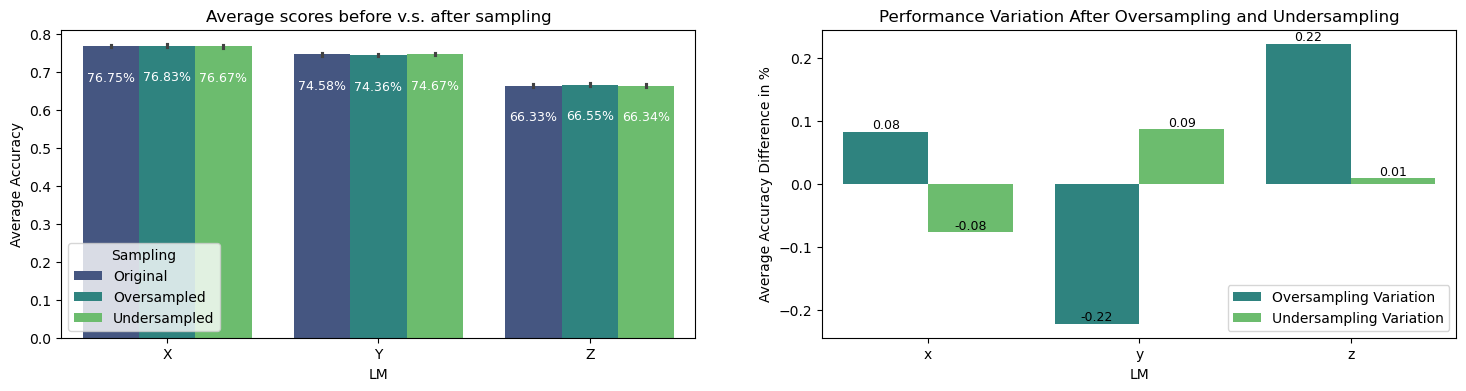

In [20]:
# Plot comparing before vs after oversampling/undersampling 
palette = sns.color_palette(shufflepalette, 3)

fig, ax = plt.subplots(1,2, figsize=(18, 4))

def prepare_and_concatenate(dfs, labels, name ="LLM"):
    for df, label in zip(dfs, labels):
        df[name] = label
    return pd.concat(dfs, ignore_index=True)

combined_original = prepare_and_concatenate([x_merge, y_merge, z_merge], ['X', 'Y', 'Z'])
combined_oversampled = prepare_and_concatenate([x_oversampled, y_oversampled, z_oversampled], ["X", "Y", "Z"])
combined_undersampled = prepare_and_concatenate([x_undersampled, y_undersampled, z_undersampled], ["X", "Y", "Z"])
full_df = prepare_and_concatenate([combined_original, combined_oversampled, combined_undersampled], ['Original', 'Oversampled', 'Undersampled'], 'Sampling')
plot = sns.barplot(data=full_df, x='LLM', y='correct', hue='Sampling', palette=palette, ax=ax[0], errorbar=("se", 0.95))

for p in plot.patches:
    if p.get_width()!=0 :
        h, w, x = p.get_height(), p.get_width(), p.get_x()
        xy = (x + w / 2., h-0.1)
        text = f'{h*100:.2f}%'
        plot.annotate(text=text, xy=xy, ha='center', va='bottom', fontsize=9, color ="white")


ax[0].set_xlabel('LM')
ax[0].set_ylabel('Average Accuracy')
ax[0].set_title('Average scores before v.s. after sampling')

# plot variation       
variation_df = pd.DataFrame({
    'lm': ['x', 'y', 'z'],
    'Oversampling Variation': [
        avg_score_x_oversampled - avg_score_x,
        avg_score_y_oversampled - avg_score_y,
        avg_score_z_oversampled - avg_score_z
    ],
    'Undersampling Variation': [
        avg_score_x_undersampled - avg_score_x,
        avg_score_y_undersampled - avg_score_y,
        avg_score_z_undersampled - avg_score_z
    ]
})

variation_df_melted = pd.melt(variation_df, id_vars=['lm'], 
                              var_name='sampling_type', 
                              value_name='score_variation')

plot = sns.barplot(x='lm', y='score_variation', hue='sampling_type', 
                   data=variation_df_melted, palette=palette[1:], capsize=0.1, ax=ax[1], errorbar=("se", 0.95))

# Add labels and title
ax[1].set_xlabel('LM')
ax[1].set_ylabel('Average Accuracy Difference in %')
ax[1].set_title('Performance Variation After Oversampling and Undersampling')
ax[1].legend(loc = 'lower right')

for p in plot.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    if h != 0: 
        xy = (x + w / 2., h)
        text = f'{h:.2f}'
        plot.annotate(text=text, xy=xy, ha='center', va='bottom', fontsize=9)
ax[1].legend(loc='lower right') 
plt.show()

The two resampling methods render similar scores, performance variations are subtle so either methods could be used.

## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's NEUTRALITY project. Ms. Sakota is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, she orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [21]:
# PROVIDED CODE
df_mmlu = pd.read_csv('task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('task_2/lm_scores_other.csv')

df_mmlu.head()

,result,question_id,question,A,B,C,D,answer,subject,correct,model_name
0,B,0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,True,X
1,C,1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,True,X
2,D,2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,True,X
3,B,3,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra,True,X
4,D,7,Statement 1 | A ring homomorphism is one to on...,"True, True","False, False","True, False","False, True",D,abstract algebra,True,X


In [22]:
df_other.head()

,result,question_id,question,A,B,C,D,answer,correct,model_name
0,B,0,Which factor will most likely cause a person t...,a leg muscle relaxing after exercise,a bacterial population in the bloodstream,several viral particles on the skin,carbohydrates being digested in the stomach,B,True,X
1,B,1,Lichens are symbiotic organisms made of green ...,carbon dioxide,food,protection,water,B,True,X
2,D,2,When a switch is used in an electrical circuit...,cause the charge to build.,increase and decrease the voltage.,cause the current to change direction.,stop and start the flow of current.,D,True,X
3,A,3,Which of the following is an example of an ass...,contact lens,motorcycle,raincoat,coffee pot,A,True,X
4,C,4,"Rocks are classified as igneous, metamorphic, ...",their color,their shape,how they formed,the minerals they contain,C,True,X


### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [23]:
# A
df_mmlu["dataset"] = "MMLU"
df_other["dataset"] = "other"
df_all = pd.concat([df_mmlu, df_other], axis=0)

score_model = df_all.groupby(["model_name", "dataset"])['correct'].agg(["mean", "sem"])
score_model

mean       sem
model_name dataset                    
X          MMLU     0.743588  0.004038
           other    0.787976  0.006668
Y          MMLU     0.761542  0.003941
           other    0.720936  0.007317
Z          MMLU     0.655951  0.004393
           other    0.671721  0.007660

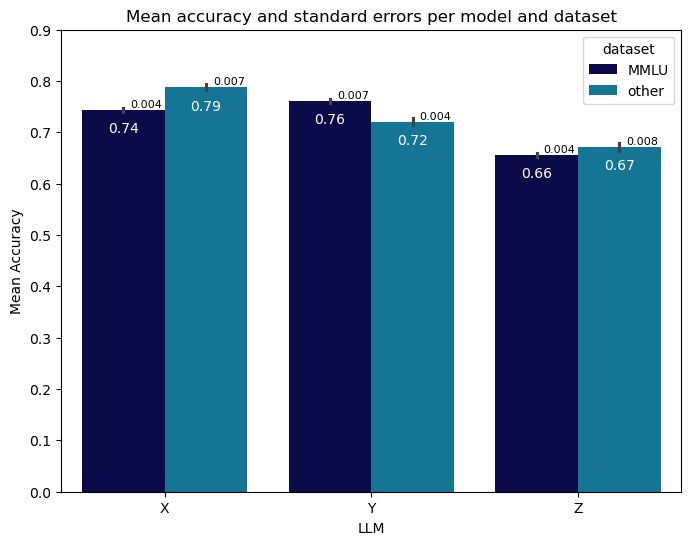

In [24]:
# B
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='model_name', y='correct', data=df_all, hue='dataset', palette=MMLUotherpalette, errorbar=("se", 0.95))
plt.ylim([0, 0.9])
plt.title('Mean accuracy and standard errors per model and dataset')
plt.ylabel('Mean Accuracy')
plt.xlabel('LLM')

for bar, sem in zip(barplot.patches, score_model['sem']):
    bar_height = bar.get_height()
    plt.annotate(f'{sem:.3f}', 
                 (bar.get_x() + bar.get_width()-0.09, bar_height + 0.001), 
                 ha='center', va='bottom', 
                 color='black', fontsize=8)
    
for bar in barplot.patches:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', 
                 (bar.get_x() + bar.get_width() / 2., height - 0.05), 
                 ha='center', va='bottom', 
                 color='white')

C. /Discuss:/

We can't really say which model perform best based solely on this information.
The perfomance of the model varies depending on the dataset tested. **Model X** perform better on the *"other"* dataset, while **Model Y** scores better on the *"MMLU"* dataset.

Therefore, we can't conclude whether Model X or Y is superior overall. Additionally, both models may exhibit biases toward certain data distributions, further complicating direct comparison.

### 2.2 (5 pt)

Ms. Sakota has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

In [25]:
# A
df_counts = df_all.groupby(['answer', 'dataset']).size().reset_index(name='counts')
df_counts['counts'] = df_counts['counts'].astype(int) // 3 # divide by 3 to account for duplication because the same dataset with same questions are used for each model
df_counts['percent'] = df_counts['counts']/df_counts.groupby('dataset')['counts'].transform('sum')*100

df_counts

,answer,dataset,counts,percent
0,A,MMLU,1611,13.773940
1,A,other,1078,28.677840
2,B,MMLU,2943,25.162449
3,B,other,1116,29.688747
4,C,MMLU,3403,29.095417
5,C,other,924,24.581006
6,D,MMLU,3739,31.968194
7,D,other,641,17.052408


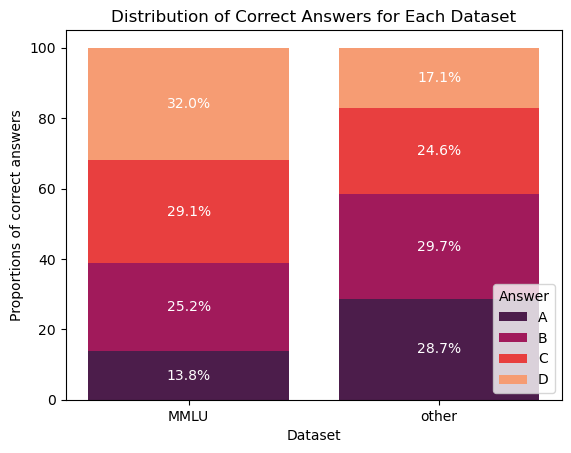

In [26]:
fig, ax = plt.subplots()
groups = df_counts.dataset.unique()
df_pivot = df_counts.pivot(index='dataset', columns='answer', values='percent')
palette = sns.color_palette(ABCDpalette,4)

bottom = np.zeros(len(groups))
for i, answer in enumerate(['A', 'B', 'C', 'D']):
    bars = ax.bar(groups, df_pivot[answer].tolist(), bottom=bottom, color=palette[i], label=answer)
    bottom += df_pivot[answer].tolist()
    
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,  
                bar.get_y() + height / 2, 
                f'{height:.1f}%', 
                ha='center', va='center', color='white', fontsize=10
            )

plt.title('Distribution of Correct Answers for Each Dataset')
plt.xlabel('Dataset')
plt.ylabel('Proportions of correct answers')
plt.legend(title='Answer', loc='lower right')
plt.show()

In [27]:
# B

# H0: the distribution of correct answers in the two datasets is the same. The distribution of correct answers (A, B, C, D) is independent of the dataset.
# HA: the distribution of correct answers in the two datasets is different

print("Null Hypothesis : The distribution of correct answers in the two datasets is the same. Equivalent to: The distribution of correct answers (A, B, C, D) is independent of the dataset.")
print("Alternative Hypothesis : The distribution of correct answers in the two datasets is different \n")

from scipy.stats import chi2_contingency

pivot_counts_df = df_counts.pivot(index='dataset', columns='answer', values='percent') # make dataset index for easier acces
res = chi2_contingency(pivot_counts_df.T.values)

alpha = 0.05
print(f'The statistic is {res.statistic:.4f} with p-value {res.pvalue:.4f}')
if res.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in the distribution of correct answers between the two datasets.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the distribution of correct answers between the two datasets.")

Null Hypothesis : The distribution of correct answers in the two datasets is the same. Equivalent to: The distribution of correct answers (A, B, C, D) is independent of the dataset.
Alternative Hypothesis : The distribution of correct answers in the two datasets is different 

The statistic is 10.5241 with p-value 0.0146
Reject the null hypothesis: There is a significant difference in the distribution of correct answers between the two datasets.


### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

In [28]:
# A
df_X = df_all[df_all["model_name"]=="X"]
score_model_per_answer = df_X.groupby(["dataset", "answer"])['correct'].agg(["mean", "sem", "std"])
score_model_per_answer

mean       sem       std
dataset answer                              
MMLU    A       0.972688  0.004062  0.163042
        B       0.799185  0.007386  0.400678
        C       0.707905  0.007796  0.454793
        D       0.633592  0.007881  0.481887
other   A       0.974026  0.004847  0.159132
        B       0.806452  0.011832  0.395256
        C       0.676407  0.015399  0.468100
        D       0.603744  0.019334  0.489501

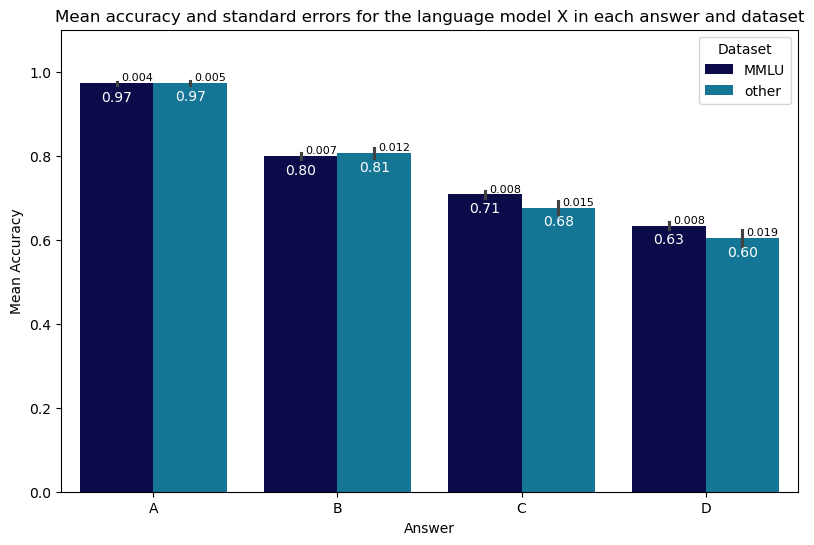

In [29]:
plt.figure(figsize=(9.5, 6))
barplot = sns.barplot(x='answer', y='correct', data=df_X, hue='dataset', palette=MMLUotherpalette, errorbar=("se", 0.95), order=['A', 'B', 'C', 'D'])
plt.ylim(0, 1.1)
plt.title('Mean accuracy and standard errors for the language model X in each answer and dataset')
plt.ylabel('Mean Accuracy')
plt.xlabel('Answer')
plt.legend(title='Dataset')


for bar, sem in zip(barplot.patches, score_model_per_answer['sem']):
    bar_height = bar.get_height()
    plt.annotate(f'{sem:.3f}', 
                 (bar.get_x() + bar.get_width()-0.09, bar_height + 0.001), 
                 ha='center', va='bottom', 
                 color='black', fontsize=8)
    
for bar in barplot.patches:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', 
                 (bar.get_x() + bar.get_width() / 2., height - 0.05), 
                 ha='center', va='bottom', 
                 color='white')

In [30]:
# B

import scipy.stats as stats
df_X_A_MMLU = df_X[(df_X['answer'] == 'A') & (df_X['dataset'] == 'MMLU')]['correct'].astype(int)
df_X_A_other = df_X[(df_X['answer'] == 'A') & (df_X['dataset'] == 'other')]['correct'].astype(int)
t_stat_A, p_value_A = ttest_ind(df_X_A_MMLU, df_X_A_other)

print('Note: the sample standard deviation is the same for answer A in both datasets, so we can do a standard t-test.')
print(f'The statistic is {t_stat_A} with p-value {p_value_A}')
alpha = 0.05
if p_value_A < alpha:
    print("Reject the null hypothesis. There is a significant difference in performance for answer 'A' between the two datasets for model X.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in performance for answer 'A' between the two datasets for model X.")

Note: the sample standard deviation is the same for answer A in both datasets, so we can do a standard t-test.
The statistic is -0.21059510911432247 with p-value 0.8332191972699248
Fail to reject the null hypothesis. There is no significant difference in performance for answer 'A' between the two datasets for model X.


In [31]:
# C

df_X_CD_MMLU = df_X[(df_X['answer'].isin(['C', 'D'])) & (df_X['dataset'] == 'MMLU')]['correct'].astype(int)
t_stat_mmlu, p_value_mmlu = ttest_ind(df_X_A_MMLU, df_X_CD_MMLU, equal_var=False)

print("Note: the sample standard deviation is different for answer A and answers C/D, we can adjust using a Welch's t-test for unequal variances.")
print(f'For the MMLU dataset, the statistic is {t_stat_mmlu} with p-value {p_value_mmlu}')

alpha = 0.05
if p_value_mmlu < alpha:
    print("Reject the null hypothesis. There is a significant difference between performance on 'A' and 'C/D' answers in the MMLU dataset with model X.")
else:
    print("Fail to reject the null hypothesis. No significant difference between performance on 'A' and 'C/D' answers in the MMLU dataset with model X.")


Note: the sample standard deviation is different for answer A and answers C/D, we can adjust using a Welch's t-test for unequal variances.
For the MMLU dataset, the statistic is 44.05883659993774 with p-value 0.0
Reject the null hypothesis. There is a significant difference between performance on 'A' and 'C/D' answers in the MMLU dataset with model X.


In [32]:
df_X_CD_other = df_X[(df_X['answer'].isin(['C', 'D'])) & (df_X['dataset'] == 'other')]['correct'].astype(int)
t_stat_other, p_value_other = ttest_ind(df_X_A_other, df_X_CD_other, equal_var=False)

print("Note: the sample standard deviation is different for answer A and answers C/D, we can adjust using a Welch's t-test for unequal variances.")
print(f'For the other dataset, the statistic is {t_stat_other} with p-value {p_value_other}')

alpha = 0.05
if p_value_other < alpha:
    print("Reject the null hypothesis. There is a significant difference between performance on 'A' and 'C/D' answers in the other dataset with model X.")
else:
    print("Fail to reject the null hypothesis. No significant difference between performance on 'A' and 'C/D' answers in the other dataset with model X.")

Note: the sample standard deviation is different for answer A and answers C/D, we can adjust using a Welch's t-test for unequal variances.
For the other dataset, the statistic is 25.13948464328854 with p-value 1.1880049447651482e-121
Reject the null hypothesis. There is a significant difference between performance on 'A' and 'C/D' answers in the other dataset with model X.


In [33]:
import matplotlib.patches as mpatches

def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    if pvalue <= 0.05:
        return "*"
    return "ns"

def annotate_pvalues_combinaison(ax, p_values, height = "adapted", h = 0.02, combinaison_nb=None):
    """Annotate p-values on the bar plot."""
    
    _, hue_labels = np.array(ax.get_legend_handles_labels())
    x_labels = np.array([tick.get_text() for tick in ax.get_xticklabels()])

    # Extract x positions for the bars from patches
    bar_positions = [patch.get_x() + patch.get_width() / 2 for patch in ax.patches if patch.get_width()!=0]
    bar_heights = [patch.get_height() for patch in ax.patches if patch.get_width() != 0]
    bar_positions, bar_heights = zip(*sorted(zip(bar_positions, bar_heights)))

    for i, ((x_label1, x_label2, hue_label1, hue_label2), p_value) in enumerate(p_values.items()):
        
        x_index1 = np.where(x_labels == x_label1)[0][0]
        x_index2 = np.where(x_labels == x_label2)[0][0]
        hue1_index = np.where(hue_labels == hue_label1)[0][0]
        index1 = hue1_index + len(hue_labels) * (x_index1)
        
        if type(hue_label2) == tuple :
            double = True
            hue3_index = np.where(hue_labels == hue_label2[0])[0][0]
            hue4_index = np.where(hue_labels == hue_label2[1])[0][0]
            x1 = bar_positions[index1]
            x3 = bar_positions[hue3_index + len(hue_labels) * (x_index2)]
            x4 = bar_positions[ hue4_index + len(hue_labels) * (x_index2)]
            x2= (x3+x4)/2
            
        else :
            double=False
            hue2_index = np.where(hue_labels == hue_label2)[0][0]
            index2 = hue2_index + len(hue_labels) * (x_index2)
            x1 = bar_positions[index1]
            x2 = bar_positions[index2]
        
        if height == "adapted" :
            max_height = max(bar_heights)
            y = max_height + 0.05 + (i - (x_index1* combinaison_nb))/10
        elif height == "bar_height" :
            max_height = max(bar_heights[index1], bar_heights[index2])
            y = max_height + 0.05

        # Draw lines and text for p-values
        ax.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c='black')
        ax.text((x1 + x2) * .5, y + h, convert_pvalue_to_asterisks(p_value), ha='center', va='bottom', color='black')
        
        if double :
            ax.plot([x3, x3, x4, x4], [y-h, y, y, y-h], lw=1.5, c='black')
      

def custom_legend_pval(original_legend=None, bbox_to_anchor=(1, 0.7)):
    # Custom handles for p-values legend
    correct_answer_legend = plt.legend(title=original_legend, loc='upper left', bbox_to_anchor=(1, 1))
    p_value_labels = [
        "***: p-value < 0.001",
        "**: p-value < 0.01",
        "*: p-value < 0.05",
        "ns: p-value >= 0.05"
    ]
    p_value_handles = [mpatches.Patch(color='none', label=label) for label in p_value_labels]

    plt.legend(handles=p_value_handles, title='Significance', loc='upper left', bbox_to_anchor=bbox_to_anchor)
    plt.gca().add_artist(correct_answer_legend)

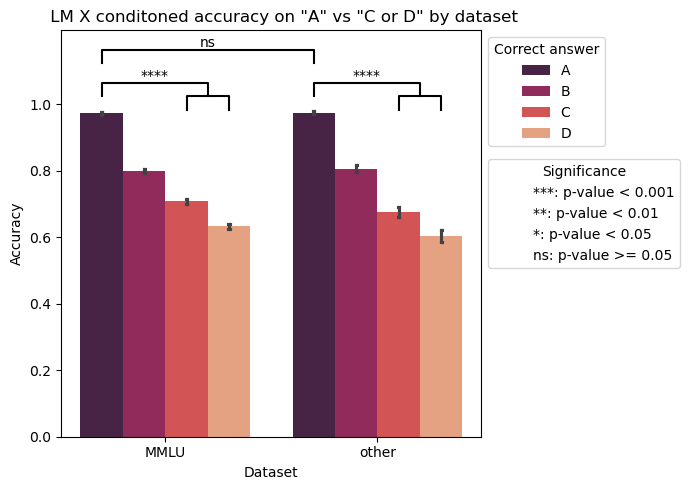

In [34]:
df_X = df_X.sort_values(by=['dataset', 'answer'])

plt.figure(figsize=(7, 5))
ax =sns.barplot(x='dataset', y='correct', data=df_X, hue='answer', capsize=0.02, palette=ABCDpalette, errorbar=("se", 0.95))

p_values = {("MMLU", "MMLU", "A", ("C", "D")):p_value_mmlu,  ("MMLU", "other", "A", "A"):p_value_A, ("other", "other", "A", ("C", "D")):p_value_other}
annotate_pvalues_combinaison(ax, p_values,"adapted", h=0.04, combinaison_nb =2)

custom_legend_pval('Correct answer')

ax.set_yticks(ax.get_yticks()[:-2])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Dataset")
ax.set_title('     LM X conditoned accuracy on "A" vs "C or D" by dataset')
plt.tight_layout()

plt.show()

To resume from these findings:
- LM X shows a clear advantage in accuracy when "A" is the correct answer.
- No significant difference were found in LM X's performance between the two datasets when the correct answer is "A." This suggests the model behaves similarly across datasets when dealing with correct answer "A."
- There was a significant difference in performance when comparing correct answers of "A" vs. "C/D" in each dataset. This implies that the model has a different capability when the correct answer is "A" compared to when it is "C" or "D," potentially revealing some bias or structural differences in how the model approaches these options.

### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [35]:
# A

mean_accuracies = df_all.groupby(['model_name', 'dataset', 'answer'])['correct'].agg(["mean", "sem"]).reset_index()

mean_accuracies_pivot = mean_accuracies.pivot_table(index=['model_name', 'dataset'], columns='answer', values=['mean', 'sem'])

print("Mean accuracies conditioned on the correct answer for all LMs for each dataset:")
mean_accuracies_pivot


Mean accuracies conditioned on the correct answer for all LMs for each dataset:


mean                                     sem  \
answer                     A         B         C         D         A   
model_name dataset                                                     
X          MMLU     0.972688  0.799185  0.707905  0.633592  0.004062   
           other    0.974026  0.806452  0.676407  0.603744  0.004847   
Y          MMLU     0.623836  0.688073  0.733470  0.904252  0.012073   
           other    0.625232  0.663978  0.762987  0.920437  0.014750   
Z          MMLU     0.643079  0.641182  0.669115  0.661139  0.011940   
           other    0.680891  0.667563  0.662338  0.677067  0.014204   

                                                  
answer                     B         C         D  
model_name dataset                                
X          MMLU     0.007386  0.007796  0.007881  
           other    0.011832  0.015399  0.019334  
Y          MMLU     0.008541  0.007580  0.004813  
           other    0.014146  0.013997  0.010697  
Z          MMLU     0.008843  0.008067  0.007742  
           other    0.014108  0.015566  0.018483

In [36]:
import math

def perform_ttest(df, model_name, answer1, answer2, dataset1, dataset2 ):
    """Performs t-tests and returns p-values for each answer between datasets"""
    data_mmlu = df[(df['model_name'] == model_name) & (df['answer'] == answer1) & (df['dataset'] == dataset1)]['correct'].astype(int)
    data_other = df[(df['model_name'] == model_name) & (df['answer'] == answer2) & (df['dataset'] == dataset2)]['correct'].astype(int)
    _, p_value = stats.ttest_ind(data_mmlu, data_other)
    return p_value  


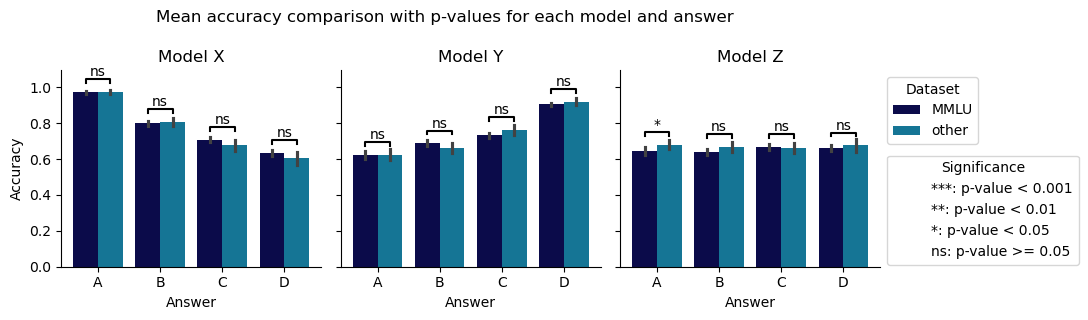

In [37]:
df_all = df_all.sort_values(by=['dataset', 'answer'])

g = sns.FacetGrid(
    data=df_all,
    col="model_name",
    sharey=True,
    sharex="col",
    margin_titles=True)

g.map_dataframe(
    sns.barplot,
    x="answer",
    y="correct",
    palette=MMLUotherpalette,
    hue="dataset")

# Perform t-tests to compare the mean accuracies of the 2 datasets on each 4 anwsers
for ax, model_name in zip(g.axes.flat, df_all['model_name'].unique()):
    p_values = {}
    for answer in df_all['answer'].unique():
        p_values[answer, answer, "MMLU", "other"] = perform_ttest(df_all, model_name, answer, answer, "MMLU", "other")
    annotate_pvalues_combinaison(ax, p_values, height = "bar_height")

    ax.set_title(f"Model {model_name}")
    ax.set_xlabel("Answer")
    ax.set_ylabel("Accuracy")
    
custom_legend_pval(original_legend='Dataset', bbox_to_anchor=(1, 0.6))
plt.subplots_adjust(top=0.85)
plt.suptitle("Mean accuracy comparison with p-values for each model and answer", y=1.05)
plt.show()

The difference of results between the two datasets for the same correct answer is mainly not significant (except for model Z at answer A). The mean accuracy of the models is similar in both datasets.

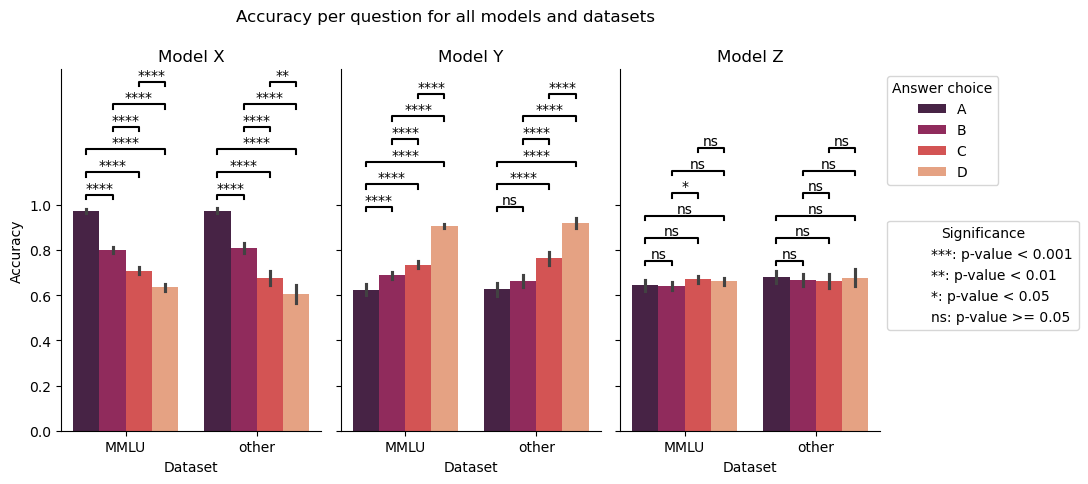

In [38]:
g = sns.FacetGrid(
    data=df_all,
    col="model_name",
    sharey=True,
    sharex="col",
    margin_titles=True)

g.map_dataframe(
    sns.barplot,
    x="dataset",
    y="correct",
    palette=ABCDpalette,
    hue="answer")


# Iterate over axes to perform t-tests for each subplot
for ax, model_name in zip(g.axes.flat, df_all['model_name'].unique()):
    p_values = {}
    
    # Perform t-tests for each pair of answers
    answers = df_all['answer'].unique()
    for dataset in df_all['dataset'].unique():
        for i in range(len(answers)):
            for j in range(i + 1, len(answers)):
                p_values[(dataset, dataset, answers[i], answers[j])] = perform_ttest(df_all, model_name, answers[i], answers[j], dataset, dataset)
    
    annotate_pvalues_combinaison(ax, p_values, combinaison_nb = math.comb(len(df_all["answer"].unique()), 2))

    ax.set_title(f"Model {model_name}")
    ax.set_xlabel("Dataset")
    ax.set_ylabel("Accuracy")

custom_legend_pval(original_legend='Answer choice', bbox_to_anchor=(1, 0.6))

plt.subplots_adjust(top=1.4)
plt.suptitle('Accuracy per question for all models and datasets', y=1.6)

ax.set_ylim(0, 1.6)
ax.set_yticks(ax.get_yticks()[:-3])
plt.show()

The difference of results between the four correct answers for the same dataset is significant in the case of LM X and Y.

B. /Discuss:/

Model X and Y show clear performance differences across the possible answers, with significantly higher accuracy for respectively the A and D answer compared to others. This is true for both datasets, MMLU and other. Also, there is no significant difference in accuracy for the same correct answer across the two datasets.


Model Z shows mostly non-significant differences between answer types, suggesting more uniform performance across A, B, C, and D answers. This is true for both datasets, but the MMLU dataset seems to be significantly less accurate in A answers than the other one.

### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Ms. Sakota. After thinking it over, Ms. Sakota concludes that more tests are needed. She orders a second round of MMLU results. However, the clever Ms. Sakota thinks of the following twist: while keeping questions fixed, she randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Ms. Sakota do this?

Permuting the labels (positions) of the correct anwsers allows to ensure that a model truly understands the questions, rather than just learning to favor a particular answer due to its frequency in the training data:

- If after the permutation, the LM genuinely understands the question, it will continue to choose the correct answer even after the labels are switched.
- If the model is however biased towards an answer, it will still frequently output this particular answer even though it is now incorrect, revealing a bias.

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

In [39]:
df_mmlu_shuffle = pd.read_csv("task_2_5/lm_scores_mmlu_shuffle.csv")

df_mmlu_shuffle["Original Accuracy"] = df_mmlu["correct"]

# Here M = 1, as we only have one possible shuffle of the original dataset
# Which simplify the formula, allowing to calculate directly the mean of the product
df_mmlu_shuffle["Test-Retest Metric"]  = df_mmlu["correct"] * df_mmlu_shuffle["correct"]

df_shuffle_metric= df_mmlu_shuffle.groupby("model_name").agg({'Original Accuracy': ['mean', 'sem'],'Test-Retest Metric': ['mean', 'sem']})

df_shuffle_metric

Original Accuracy           Test-Retest Metric          
                        mean       sem               mean       sem
model_name                                                         
X                   0.743588  0.004038           0.588406  0.004551
Y                   0.761542  0.003941           0.571648  0.004576
Z                   0.655951  0.004393           0.441604  0.004592

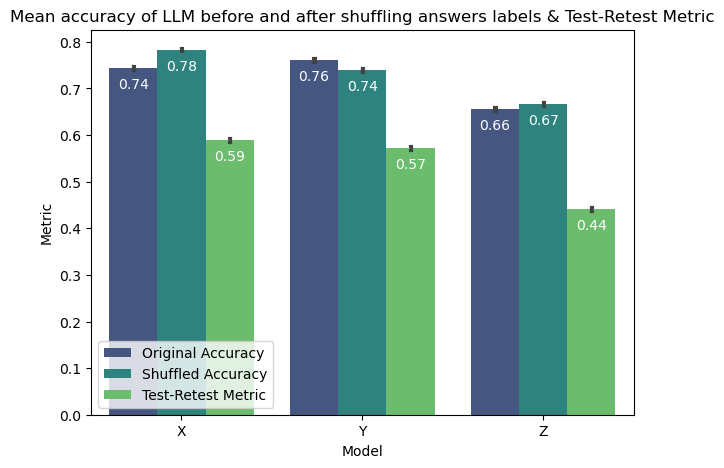

In [40]:
# Easy format to plot
df_mmlu_shuffle = df_mmlu_shuffle.rename(columns={'correct': "Shuffled Accuracy"})
df_pivot = pd.melt(df_mmlu_shuffle[["Original Accuracy", "Shuffled Accuracy", "model_name", "Test-Retest Metric"]], id_vars='model_name', var_name='metric', value_name='metric_value')
fig, ax = plt.subplots(figsize=(7, 5))

sns.barplot(x='model_name', y='metric_value', data=df_pivot, hue='metric', capsize=0.02, palette=shufflepalette, errorbar=("se", 0.95))

for p in ax.patches:
    if p.get_width()!=0 :
        h, w, x = p.get_height(), p.get_width(), p.get_x()
        xy = (x + w / 2., h-0.05 )
        text = f'{h:.2f}'
        ax.annotate(text=text, xy=xy, ha='center', va='bottom', color= "white")
        
plt.legend(title='')
plt.title('Mean accuracy of LLM before and after shuffling answers labels & Test-Retest Metric')
plt.ylabel("Metric")
plt.xlabel("Model")

plt.show()

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

In [41]:
# A

answer_distribution = df_mmlu.groupby(['model_name', 'result']).size().reset_index(name='count')
answer_distribution['percentage'] = answer_distribution.groupby('model_name')['count'].transform(lambda x: x / x.sum())
accuracy_conditioned = df_mmlu.groupby(['model_name', 'result'])['correct'].mean().reset_index(name='accuracy')
result = pd.merge(accuracy_conditioned, answer_distribution[['model_name', 'result', 'percentage']], on=['model_name', 'result'])

# For the plot 
result["accuracy_per_percentage"] = result["percentage"] * result["accuracy"]

print("Distribution of Answers and Accuracy Conditioned on the Answer:")
result


Distribution of Answers and Accuracy Conditioned on the Answer:


,model_name,result,accuracy,percentage,accuracy_per_percentage
0,X,A,0.367927,0.364142,0.133977
1,X,B,0.884543,0.227343,0.201094
2,X,C,1.000000,0.205968,0.205968
3,X,D,1.000000,0.202548,0.202548
4,Y,A,0.937500,0.091655,0.085927
5,Y,B,0.897606,0.192886,0.173136
6,Y,C,0.827861,0.257780,0.213406
7,Y,D,0.631608,0.457678,0.289073
8,Z,A,0.476103,0.186047,0.088577
9,Z,B,0.654073,0.246666,0.161337


In [42]:
# The real answer distribution is the same for the 3 models, as they answer to the same dataset

real_answer_distribution = df_mmlu['answer'].value_counts(normalize=True).reset_index()
real_answer_distribution.sort_values('answer', inplace=True)
print("Real answer distribution of the Dataset:")
real_answer_distribution

Real answer distribution of the Dataset:


,answer,proportion
3,A,0.137739
2,B,0.251624
1,C,0.290954
0,D,0.319682


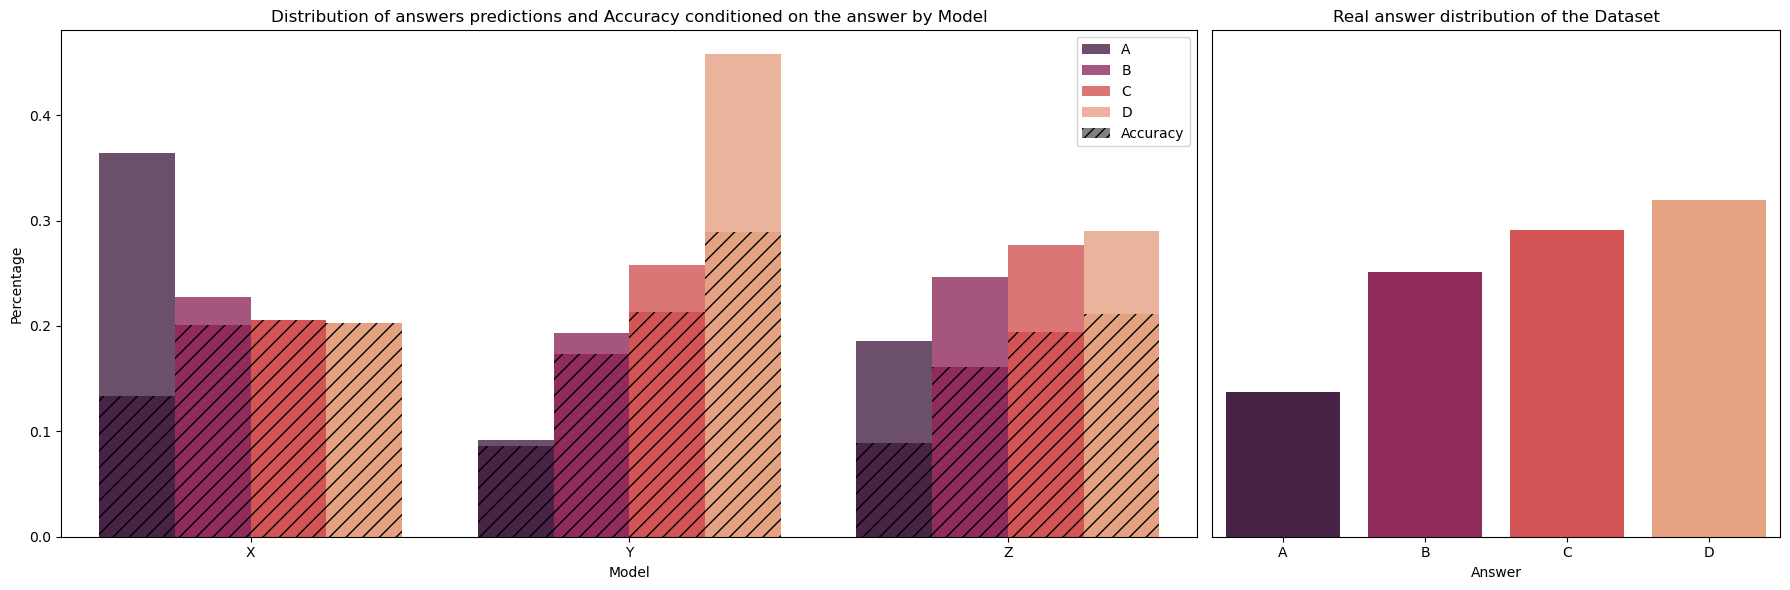

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 1]}, sharey=True)

# Subplot 1: Distribution of Answers & Accuracy by Model

sns.barplot(ax=axes[0], x='model_name', y='percentage', hue='result', data=result, palette=ABCDpalette, alpha=0.8)
sns.barplot(ax=axes[0], x='model_name', y='accuracy_per_percentage', hue='result', data=result, palette=ABCDpalette, hatch='//', legend=False)

handles, labels = axes[0].get_legend_handles_labels()
custom_legend = [plt.Rectangle((0, 0), 1, 1, facecolor='gray', hatch="///", label='Accuracy')]

axes[0].legend(handles[:len(result['result'].unique())] + custom_legend, 
               labels[:len(result['result'].unique())] + ['Accuracy'])

axes[0].set_title('Distribution of answers predictions and Accuracy conditioned on the answer by Model')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Percentage')

# Subplot 2: Real Answer Distribution for the Dataset
# It is the same distribution for the 3 models, as they answer to the same dataset

sns.barplot(ax=axes[1], x='answer', y='proportion', hue="answer", data=real_answer_distribution, palette=ABCDpalette)
axes[1].set_title('Real answer distribution of the Dataset')
axes[1].set_xlabel('Answer')
axes[1].tick_params(left=False)

plt.tight_layout()
plt.show()

B. /Discuss:/

For **models X** and **Y**, we observed that as the frequency of their predictions for a particular answer increased, their accuracy on those predictions decreased. However, they performed significantly better on the answers they predicted less frequently. In contrast, **model Z** exhibited a more balanced relationship between answer prediction distribution and accuracy, conditioned on the answer, though it showed lower accuracy overall compared to the other models.

On the other hand, when comparing these models with the real answer distribution of the dataset, we see that **model Z** reflects the real distribution better than the others. However, **model X** erroneously predicts answer A too frequently, even though A is the least common answer in the real dataset. **Models Y** and **Z** do a better job of reflecting the overall order of the real distribution, though model Y tends to overpredict D, even though D is indeed the most frequent answer in the real distribution.

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage in the West, _Westoda_:

```
"Hmm, correct you are, young padawan, to question how the world is seen by large language models! Simple 'text' it is not, hmm? No, no, no! Characters and words, the way of puny humans, this is not, heh heh heh.

'Tokens', they use, yes! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z'. Chunky blocks of text, they become, yes! 'Hello world', a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, yes! Confusing, it is, hmm?

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.
Meditate on this, you should. The force of natural language processing, strong it is. But patience, you must have, my young padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Yes, hmmm!"
```

Admittingly, Westoda at times speaks in riddles… However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [44]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    !pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

humans see: "hello world" --> language models see: [24912, 2375]


### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

In [45]:
def decode_text(t):
    enc = tiktoken.encoding_for_model('gpt-4o')
    s = enc.decode(t)
    return s

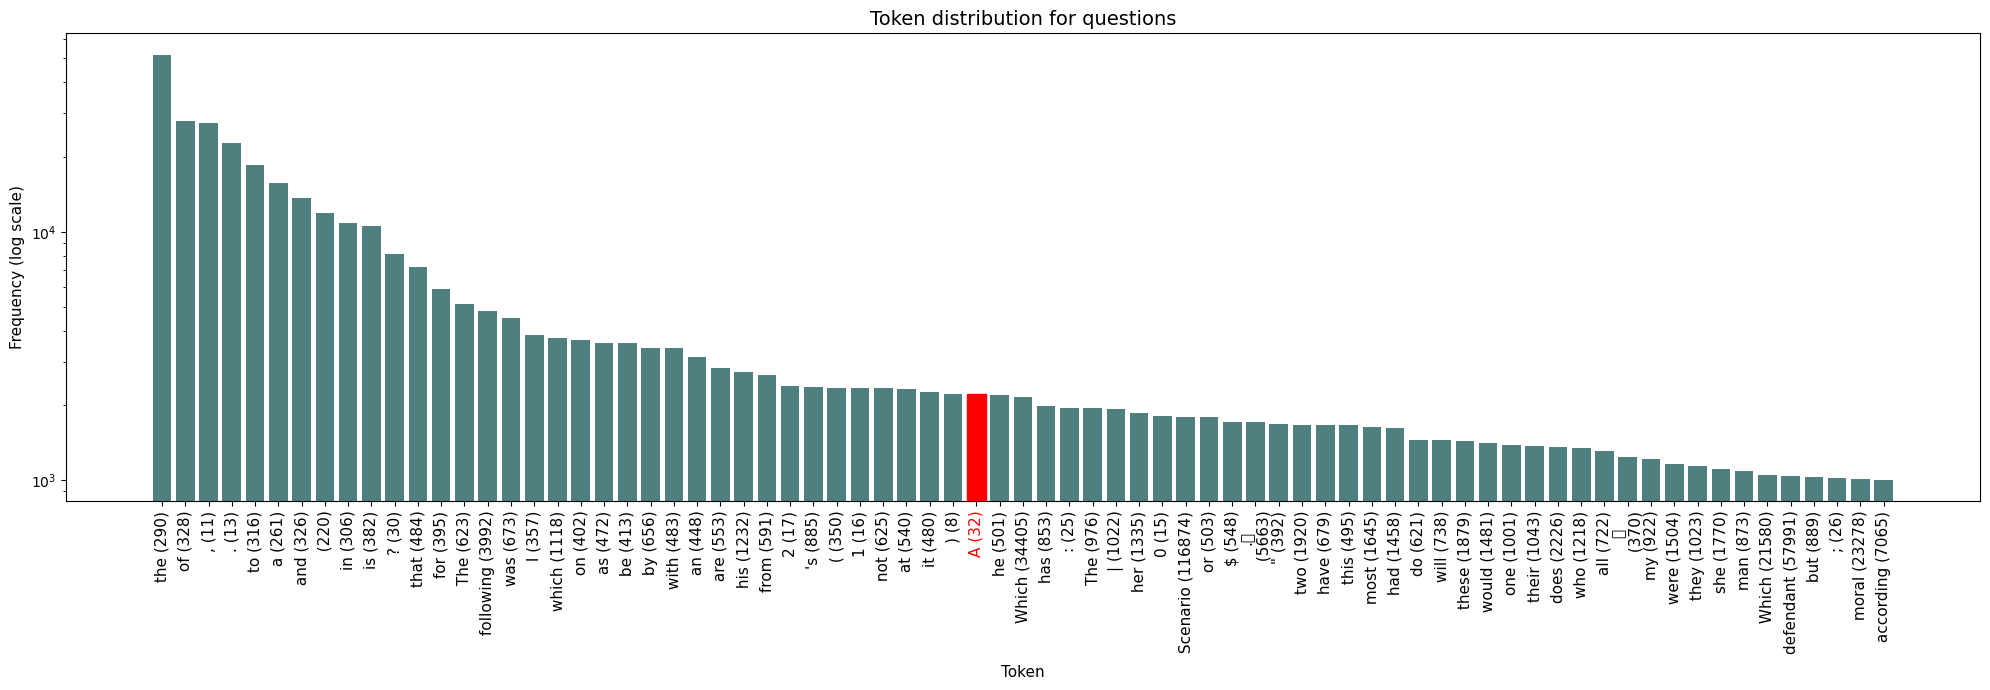

Note that "A" is the only answer choice token that appears in the most common tokens.


In [46]:
%%capture --no-stdout --no-display
# capture one annoying warning 
from collections import Counter

#A

#tokenize questions and count the frequency of each token
question_tokens = [item for row in df_test['question'].apply(tokenize_text) for item in row] 
question_token_counts = Counter(question_tokens)  
token_freq = sorted(question_token_counts.items(), key=lambda x: x[1], reverse=True) 
cutoff = 75
tokens, freqs = zip(*token_freq[:cutoff])  
tokens_with_str = [f'{decode_text([token])} ({token})' for token in tokens] 

plt.figure(figsize=(20, 7))
bars = plt.bar(range(len(tokens)), freqs, color=QApalette[0])  
plt.yscale('log')

# Highlight token 'A'
token_to_highlight = 'A'
highlight_index = None
for i, token in enumerate(tokens):
    if decode_text([token]) == token_to_highlight:
        highlight_index = i
        break

if highlight_index is not None and highlight_index < len(bars):
    bars[highlight_index].set_color('red')
    xtick_colors = ['red' if i == highlight_index else 'black' for i in range(len(tokens))]
    plt.xticks(range(len(tokens)), tokens_with_str, rotation=90, fontsize=11)

plt.title('Token distribution for questions', fontsize=14)
plt.ylabel('Frequency (log scale)', fontsize=11)
plt.xlabel('Token', fontsize=11)

for i, label in enumerate(plt.gca().get_xticklabels()):
    label.set_color(xtick_colors[i])

plt.tight_layout()
plt.show()

print('Note that "A" is the only answer choice token that appears in the most common tokens.')

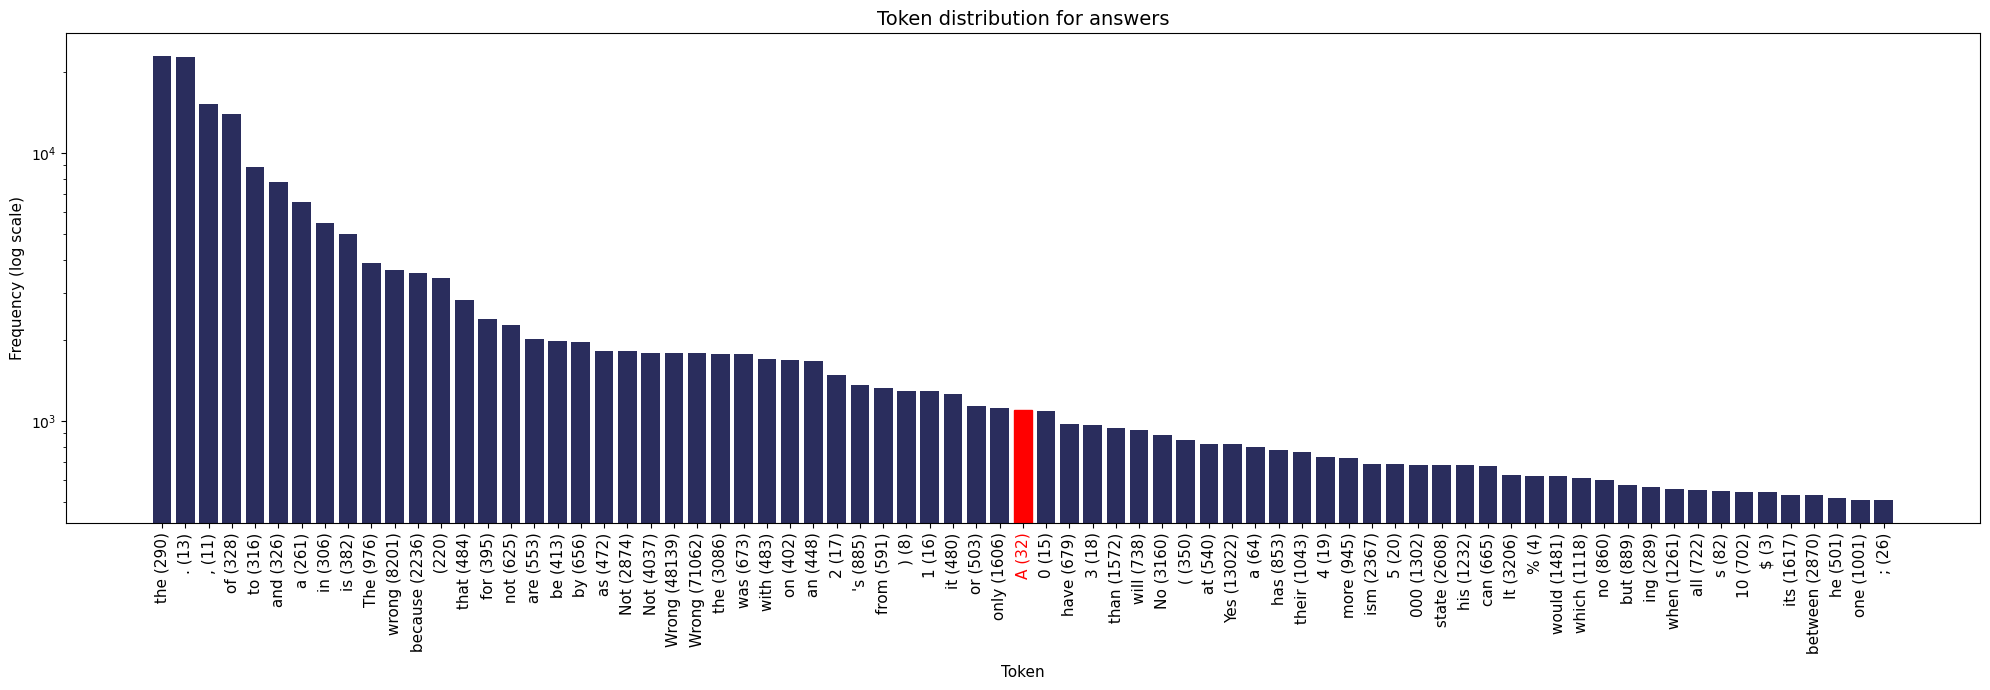

In the answers too, "A" is the only answer choice token that appears within the most common.


In [47]:
#B

df_answers = pd.concat([df_test['A'], df_test['B'], df_test['C'], df_test['D']])
answers_tokens = [item for row in df_answers.apply(tokenize_text) for item in row]
answer_token_counts = Counter(answers_tokens)  # Count the frequency of each token
answer_token_freq = sorted(answer_token_counts.items(), key=lambda x: x[1], reverse=True)  # Sort by frequency
cutoff = 75
answer_tokens, answer_freqs = zip(*answer_token_freq[:cutoff])  # Get the top tokens and their frequencies

answer_tokens_with_str = [f'{decode_text([token])} ({token})' for token in answer_tokens]

plt.figure(figsize=(20, 7))
bars = plt.bar(range(len(answer_tokens)), answer_freqs, color=QApalette[1])  # Bar plot in black
plt.yscale('log')

# Highlight 'A' token 
token_to_highlight = 'A'
highlight_index = None
for i, token in enumerate(answer_tokens):
    if decode_text([token]) == token_to_highlight:
        highlight_index = i
        break

if highlight_index is not None and highlight_index < len(bars):
    bars[highlight_index].set_color('red')
    xtick_colors = ['red' if i == highlight_index else 'black' for i in range(len(answer_tokens))]
    plt.xticks(range(len(answer_tokens)), answer_tokens_with_str, rotation=90, fontsize=11)

plt.title('Token distribution for answers', fontsize=14)
plt.ylabel('Frequency (log scale)', fontsize=11)
plt.xlabel('Token', fontsize=11)

for i, label in enumerate(plt.gca().get_xticklabels()):
    label.set_color(xtick_colors[i])

plt.tight_layout()
plt.show()
print('In the answers too, "A" is the only answer choice token that appears within the most common.')

In [48]:
def plot_token_distribution(question_tokens, ax = ax, title='Token distribution for questions', cutoff=100, color=None):
        
    question_token_counts = Counter(question_tokens) # count the frequency of each token
    token_freq = sorted(question_token_counts.items(), key=lambda x: x[1], reverse=True) # sort the tokens by frequency
    tokens, freqs = zip(*token_freq[:cutoff]) # get the top tokens and their frequencies
    tokens_with_str = [f'{decode_text([token])} ({token})' for token in tokens] 
    
    if color is None:
        color = 'black'

    ax.bar(range(len(tokens)), freqs, color=color) 
    ax.set_yscale('log')
    ax.set_xticks(range(len(tokens)))
    ax.set_xticklabels(tokens_with_str, rotation=90, fontsize=11)
    ax.set_title(title, fontsize=14)

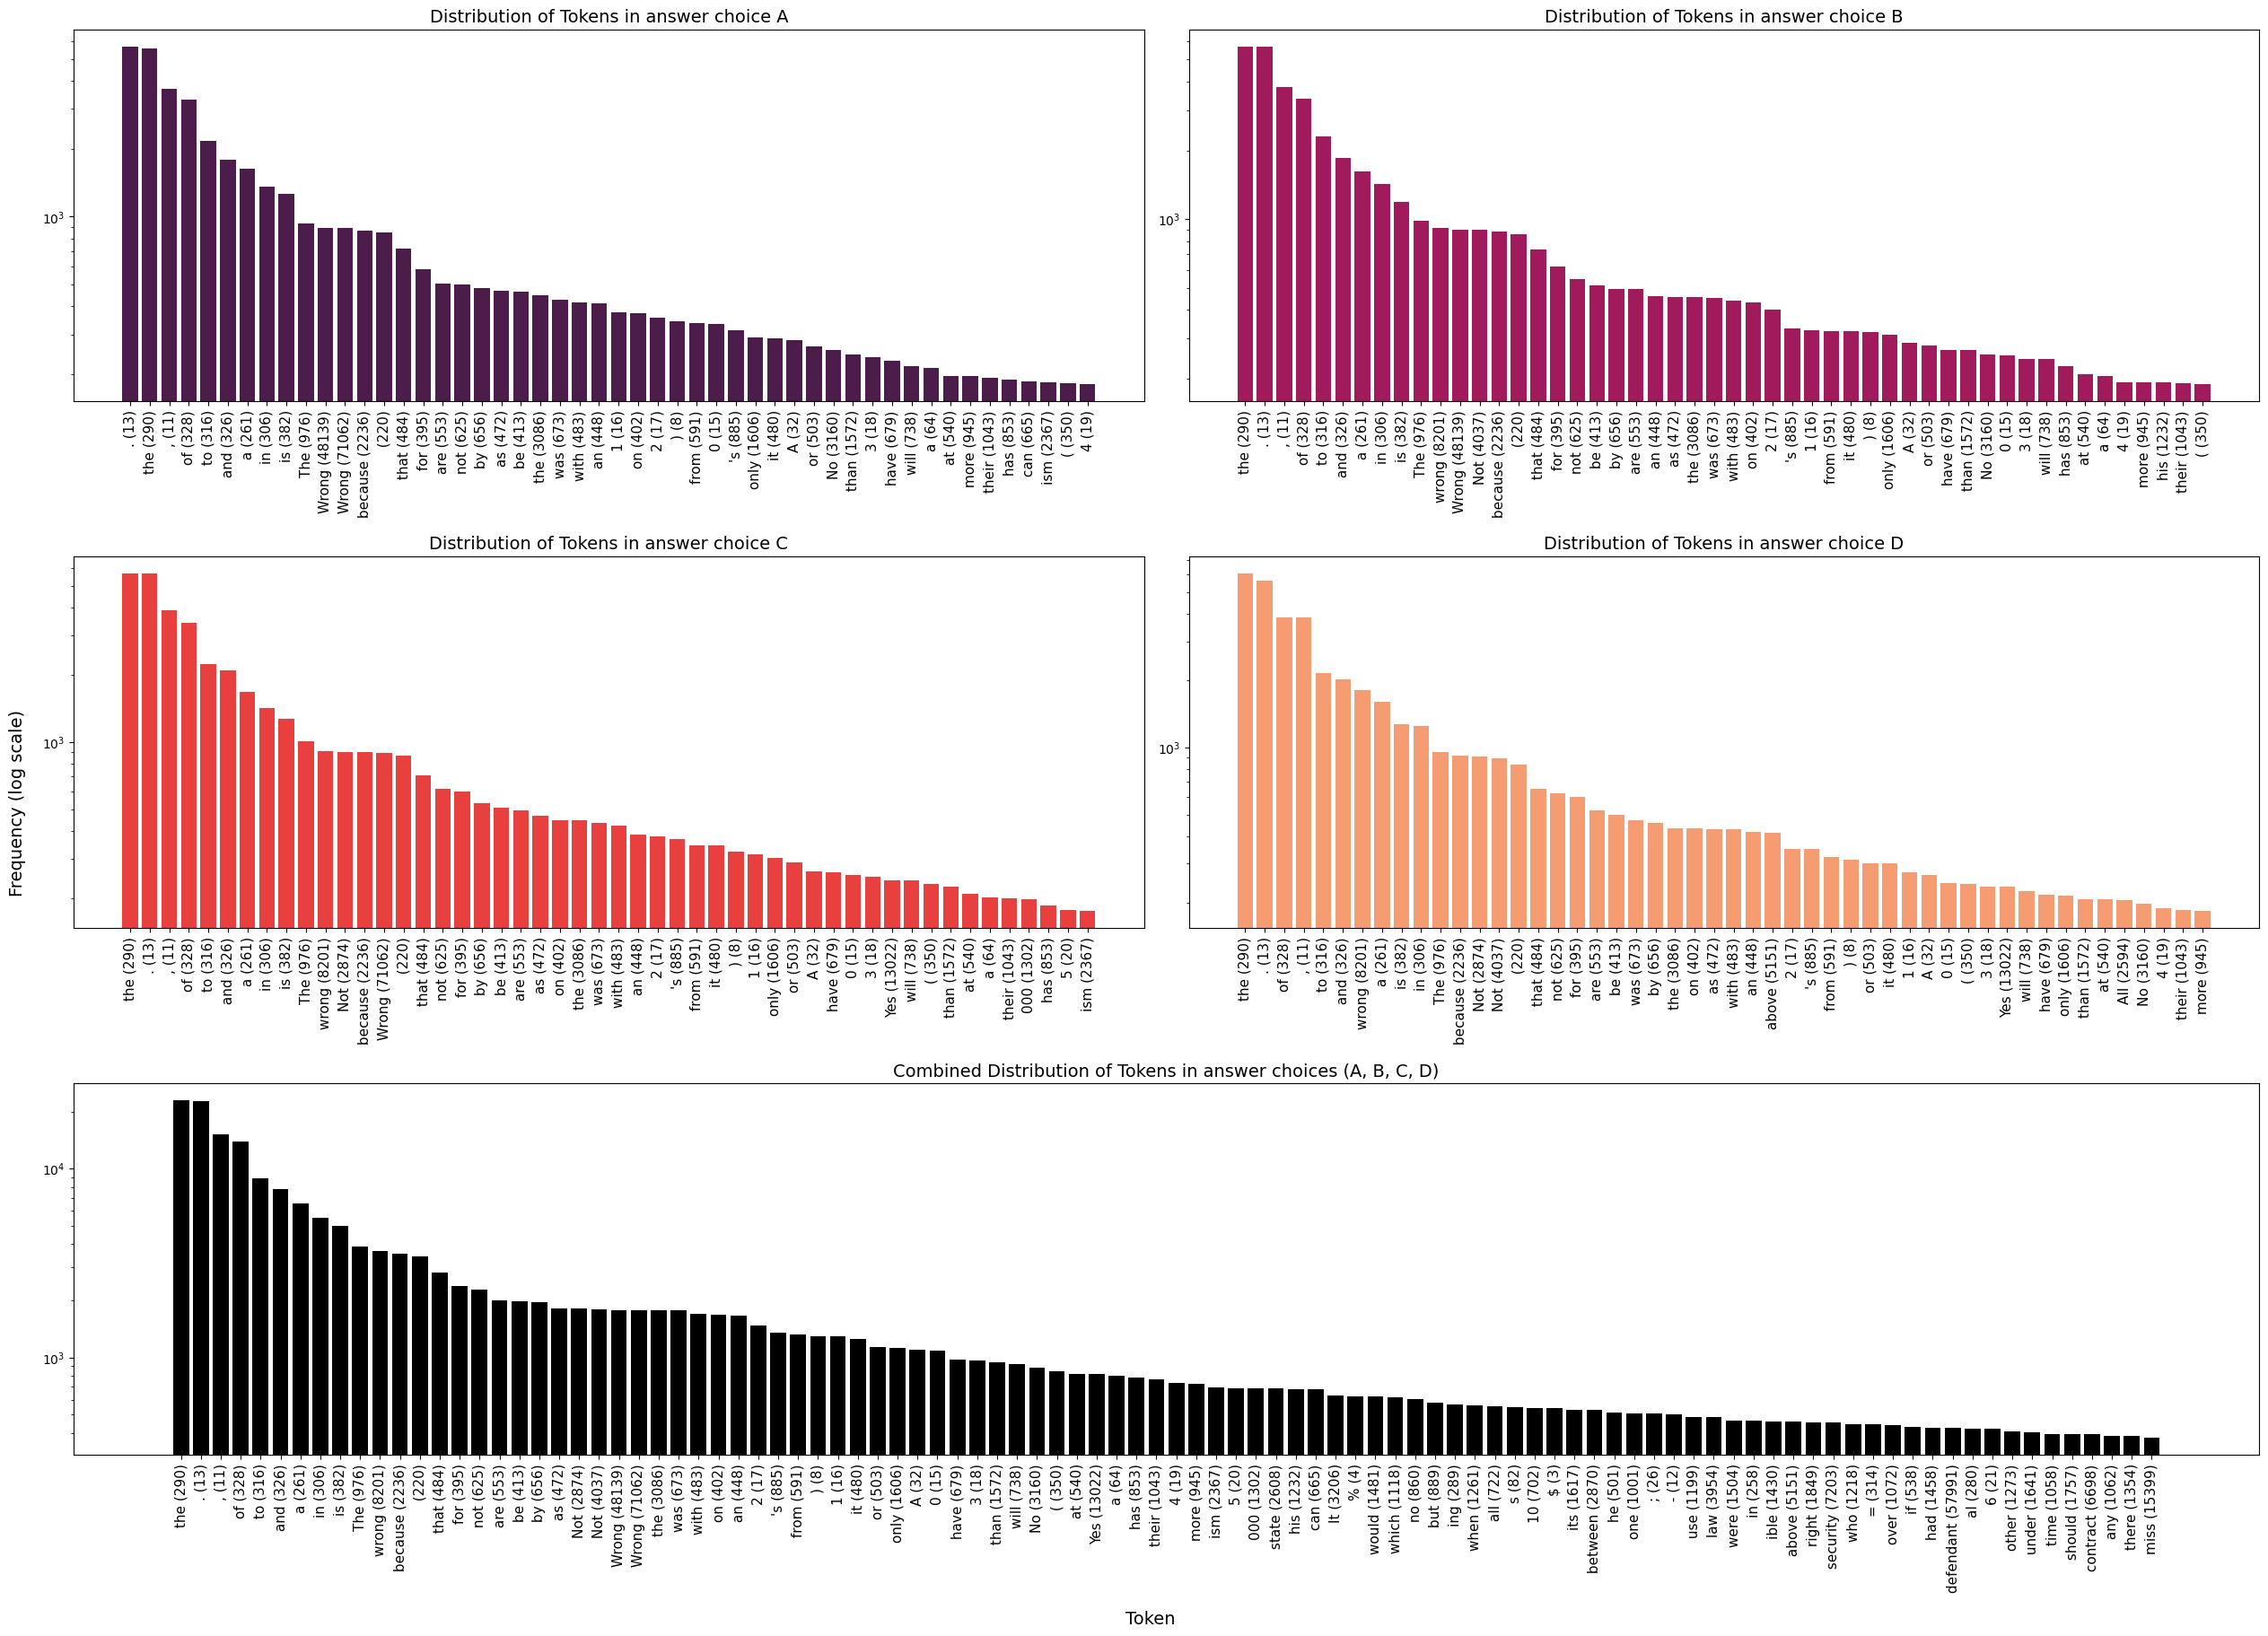

In [49]:
tokens_A = [item for row in df_test['A'].apply(tokenize_text) for item in row]
tokens_B = [item for row in df_test['B'].apply(tokenize_text) for item in row]
tokens_C = [item for row in df_test['C'].apply(tokenize_text) for item in row]
tokens_D = [item for row in df_test['D'].apply(tokenize_text) for item in row]
combined_tokens = [item for row in pd.concat([df_test['A'], df_test['B'], df_test['C'], df_test['D']]).apply(tokenize_text) for item in row]

fig = plt.figure(figsize=(25, 18))
gs = fig.add_gridspec(3, 2)  

color_A, color_B, color_C, color_D = ABCDpalette

axs = []
axs.append(fig.add_subplot(gs[0, 0]))  # A
axs.append(fig.add_subplot(gs[0, 1]))  # B
axs.append(fig.add_subplot(gs[1, 0]))  # C
axs.append(fig.add_subplot(gs[1, 1]))  # D

for ax, tokens, title, color in zip(axs, 
                                    [tokens_A, tokens_B, tokens_C, tokens_D], 
                                    ['A', 'B', 'C', 'D'],
                                    [color_A, color_B, color_C, color_D]):
    plot_token_distribution(tokens, ax, f'Distribution of Tokens in answer choice {title}', cutoff=50, color=color)


ax_combined = fig.add_subplot(gs[2, :]) 
plot_token_distribution(combined_tokens, ax_combined, 'Combined Distribution of Tokens in answer choices (A, B, C, D)')

fig.text(0.5, -0.005, 'Token', ha='center', va='center', fontsize=14)
fig.text(-0.005, 0.5, 'Frequency (log scale)', ha='center', va='center', rotation='vertical', fontsize=14)

plt.tight_layout()
plt.show()

In [50]:
# C

token_val = {letter: tokenize_text(letter)[0] for letter in ('A', 'B', 'C', 'D')}
token_occurences = pd.DataFrame(columns=['Questions', 'Answers'])
token_occurences['Questions'] = pd.Series(question_tokens).value_counts()[[token_val['A'], token_val['B'], token_val['C'], token_val['D']]]
token_occurences['Questions'] /= token_occurences['Questions'].sum()
token_occurences['Answers'] = pd.Series(answers_tokens).value_counts()[[token_val['A'], token_val['B'], token_val['C'], token_val['D']]]
token_occurences['Answers'] /= token_occurences['Answers'].sum()
token_occurences.index = ['A', 'B', 'C', 'D']

print('Relative token distributions in questions and answers\n')
print(token_occurences)

Relative token distributions in questions and answers

   Questions   Answers
A   0.905521  0.631821
B   0.031902  0.099943
C   0.041718  0.185526
D   0.020859  0.082711


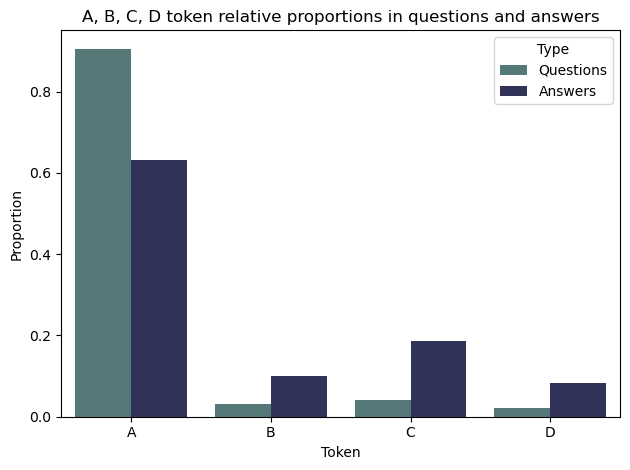

In [51]:
token_occurences_melted = token_occurences.reset_index().melt(id_vars='index', var_name='Type', value_name='Proportion').rename(columns={'index': 'Token'})
sns.barplot(x='Token', y='Proportion', hue='Type', data=token_occurences_melted, palette=QApalette)
plt.title('A, B, C, D token relative proportions in questions and answers')
plt.xlabel('Token')
plt.ylabel('Proportion')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each combined question-answers pair, compute: 
1. the number of "A", "B", "C", and "D" tokens; and
2. the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


In [52]:
#A

pair_tokens = pd.DataFrame(columns=['tokens', 'A_count', 'B_count', 'C_count', 'D_count'])
pair_tokens['tokens'] = df_test.apply(lambda row: tokenize_text(row['question']) + 
                                                  tokenize_text(row['A']) + 
                                                  tokenize_text(row['B']) + 
                                                  tokenize_text(row['C']) + 
                                                  tokenize_text(row['D']), axis=1)

def count_tokens(tokens, token_val):
    return {letter: tokens.count(val) for letter, val in token_val.items()}

pair_tokens[['A_count', 'B_count', 'C_count', 'D_count']] = pair_tokens['tokens'].apply(lambda tokens: pd.Series(count_tokens(tokens, token_val)))
pair_tokens['total_count'] = pair_tokens['tokens'].apply(len)
pair_tokens['correct'] = df_test['answer']

In [53]:
grouped_sum = pair_tokens.groupby('correct').agg({
    'A_count': 'sum',
    'B_count': 'sum',
    'C_count': 'sum',
    'D_count': 'sum',
    'total_count': 'sum'
})

grouped_sum['A_B_C_D_count'] = grouped_sum[['A_count', 'B_count', 'C_count', 'D_count']].sum(axis=1)

print('Total count of tokens "A", "B", "C", "D" and total count of tokens')
grouped_sum.sum()

Total count of tokens "A", "B", "C", "D" and total count of tokens


A_count             3314
B_count              252
C_count              425
D_count              195
total_count      1287822
A_B_C_D_count       4186
dtype: int64

In [54]:
print('Numbers of tokens "A", "B", "C", "D" by "correct" answer')
grouped_sum

Numbers of tokens "A", "B", "C", "D" by "correct" answer


,A_count,B_count,C_count,D_count,total_count,A_B_C_D_count
correct,,,,,,
A,783,61,81,42,300318,967
B,803,68,102,44,307647,1017
C,811,68,125,55,331965,1059
D,917,55,117,54,347892,1143


In [55]:
mean_freq_over_total = grouped_sum[['A_count', 'B_count', 'C_count', 'D_count']].div(grouped_sum['total_count'], axis=0)*100
mean_freq_over_total.head()
print('Mean frequency over total numbers of tokens by "correct" answer')
mean_freq_over_total

Mean frequency over total numbers of tokens by "correct" answer


,A_count,B_count,C_count,D_count
correct,,,,
A,0.260724,0.020312,0.026971,0.013985
B,0.261013,0.022103,0.033155,0.014302
C,0.244303,0.020484,0.037655,0.016568
D,0.263588,0.015810,0.033631,0.015522


In [56]:
mean_freq_over_ABCD = grouped_sum[['A_count', 'B_count', 'C_count', 'D_count']].div(grouped_sum['A_B_C_D_count'], axis=0)
print('Mean frequency over the sum of A, B, C & D counts by "correct" answer')
mean_freq_over_ABCD

Mean frequency over the sum of A, B, C & D counts by "correct" answer


,A_count,B_count,C_count,D_count
correct,,,,
A,0.809721,0.063082,0.083764,0.043433
B,0.789577,0.066863,0.100295,0.043265
C,0.765817,0.064212,0.118036,0.051936
D,0.802275,0.048119,0.102362,0.047244


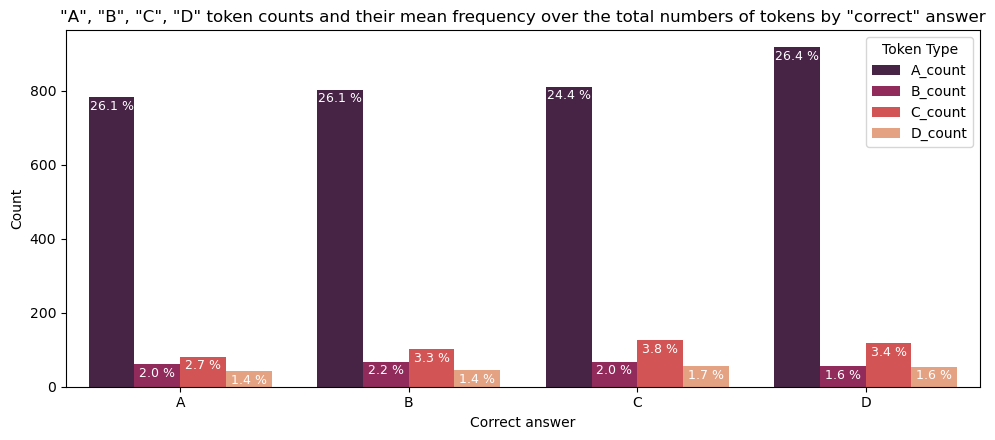

In [57]:
# Counts of tokens by correct answer
grouped_sum_melted = grouped_sum[['A_count', 'B_count', 'C_count', 'D_count']].reset_index().melt(id_vars='correct', var_name='Token Type', value_name='Count')
# Mean accuracy over total numbers of tokens
mean_percentage = mean_freq_over_total[['A_count', 'B_count', 'C_count', 'D_count']].reset_index().melt(id_vars='correct', var_name='Token Type', value_name='Percentage')
grouped_sum_melted["Mean"] = mean_percentage["Percentage"] *100

plt.figure(figsize=(10, 4.5))
ax = sns.barplot(data=grouped_sum_melted, x='correct', y='Count', hue='Token Type', palette=ABCDpalette)

for p, mean in zip(ax.patches, grouped_sum_melted["Mean"]):
    if p.get_width() != 0:
        h, w, x = p.get_height(), p.get_width(), p.get_x()
        xy = (x + w / 2., h - 25 )  # Adjusted position
        ax.annotate(text=f'{mean:.1f} %', xy=xy, ha='center', va='center', color="white", fontsize=9)

ax.set_title('"A", "B", "C", "D" token counts and their mean frequency over the total numbers of tokens by "correct" answer')
ax.set_xlabel('Correct answer')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

B. /Discuss:/

**"A"** token has a higher mean frequency across *Q&A* pairs. This could potentially introduce a **bias**, as the model might learn that A occurs more frequently and favor predicting A, regardless of the actual context. To mitigate this potential bias, we could rather choose answer choice labels that do not naturally appear in english written language (such as a capital "A" starting a sentence). Instead, to bypass the naturally imbalanced letter usage distribution in language, using special symbols that do not appear in written language could potentially solve the problem.

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

There are 644 Q&A pairs over 14042 where that would be a problem: 4.59%
Some subjects would be particularly affected, here are the percentages (%) of not completely processed information for each subject:
subject
high school european history    56.97
high school world history       52.32
high school us history          41.67
professional law                20.53
professional medicine            5.15
college medicine                 2.89
security studies                 1.63
high school computer science     1.00
virology                         0.60
high school statistics           0.46
Name: count, dtype: float64


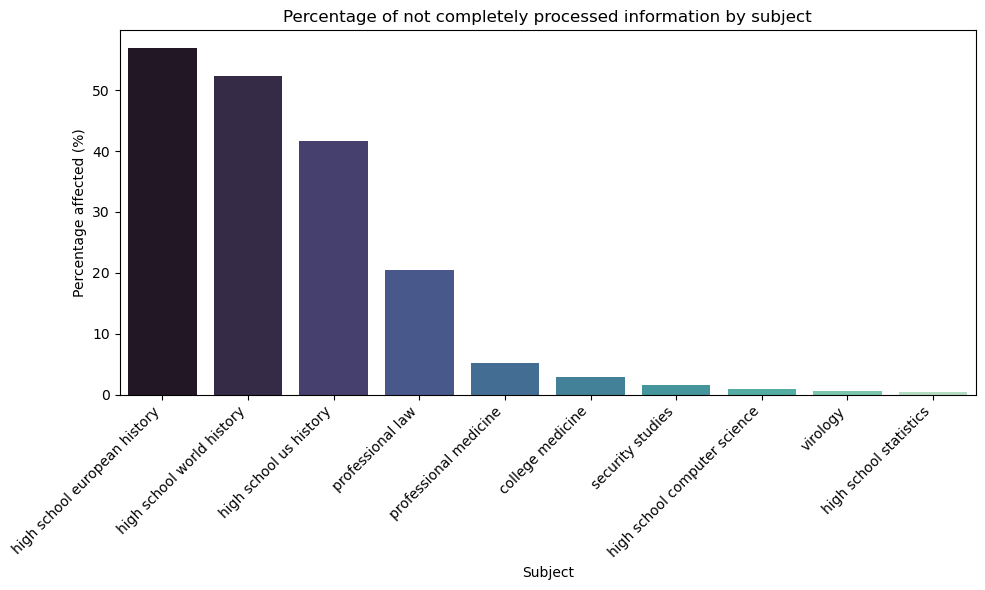

In [58]:
#A

pair_tokens['subject'] = df_test['subject']

filtered_pair_tokens = pair_tokens[pair_tokens['total_count'] > 300][['subject']] # filter pairs where there are more than 300 tokens

filtered_count = filtered_pair_tokens.shape[0]
total_count = pair_tokens.shape[0]
percentage_filtered = round(100 * filtered_count / total_count, 2)

print(f'There are {filtered_count} Q&A pairs over {total_count} where that would be a problem: {percentage_filtered}%')

subject_proportion = (100 * filtered_pair_tokens['subject'].value_counts() / pair_tokens['subject'].value_counts()).dropna().sort_values(ascending=False) # check percentage affected in each subject

print('Some subjects would be particularly affected, here are the percentages (%) of not completely processed information for each subject:')
print(round(subject_proportion, 2))

plt.figure(figsize=(10, 6))
sns.barplot(x=subject_proportion.index, y=subject_proportion.values, palette=XYZpalette, hue=subject_proportion.index, legend=False)
plt.title('Percentage of not completely processed information by subject')
plt.xlabel('Subject')
plt.ylabel('Percentage affected (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

B. /Dicsuss:/

We could reformulate long questions and answers using text summarization techniques to fit within the 300-token limit, but ensuring they retain their meaning. In that case we could use the turbo model. 

Otherwise, we could have a hybrid approach and use the slower and more expensive model only when necessary, so for subjects or questions that exceed this 300-token limit.

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

**hint**
- Try to use the MECE framework: _Mutually Exclusive Collectively Exhaustive_

/Discuss:/

1. **For now, unless the performance of LMs improves, their assistance for educational tasks should remain under human supervision**. The results of part 1 showed that LMs are unreliable for the format of answers they produce and the factual accuracy of said answers. The first can be a problem for specific applications where a specific format is important, where postprocessing would be needed for LMs to be of use. The latter is of even greater importance — LMs in education would not be able to replace professionals in teaching across many specific fields, as they still make many inaccurate predictions. 

2. **Find a good compromise between precision and speed to allow for efficient but fast and cheap LM deployment.** Try to find the best way, for instance based on the topic it will be used for, to deploy LMs that are able to appropriately respond without using excessive token processing.

3. **Rigorously and precisely test models before using them in real-life tasks. Be aware of test dataset biases and imbalances.** For instance, shuffling the answers and the test-retest metric revealed that the LMs apparent “knowledge” of a topic might only be a learned association between the question and answer token (overfitting the test data). Model Y for example overpredicts answer D, which is the one with higher frequency in the real answer distribution. Other imbalances to consider are answer label imbalance, answer and question token imbalance, topic imbalance, etc. While often not all can be addressed simultaneously, some criteria should be chosen for rebalancing and other criteria should at least be monitored to uncover possible answer biases. Furthermore, using different datasets can be useful to assess which tasks a model might be better at. 

4. **Be aware of the clear intrinsic biases of LM predictions that were exposed during the analysis.** Besides test-set biases, intrinsic model biases need to be considered, such as a preference for tokens encountered more frequently during training. The capital “A” token is naturally more present in language (therefore also in the Q&A pairs of the dataset) and can represent a training bias that can lead to faulty performance assessment. This associative prediction with disregard of context occurs for model X, which overpredicts answer A even though it was the least present in the ground truth distribution.